# Visualize Results: Downstream Performance - Binary Classification Corrupted Experiments -> Training and Test identically imputed


[Set Average Best Imputation Method Manually](#Set-Average-Best-Imputation-Method-Manually)


This notebook should answer the questions: *Does imputation lead to better downstream performances?*

Data needs to be preprocessed with other notebook, her we only import two csv files with raw data regarding the results of the experiment and information about the used datasets!



In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import seaborn as sns
from pandas.api.types import CategoricalDtype
from pathlib import Path

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import xarray as xr


%matplotlib inline

%load_ext autoreload
%autoreload 2

## Settings

In [2]:
sns.set(style="whitegrid")
sns.set_context('paper', font_scale=1.5)
mpl.rcParams['lines.linewidth'] = '2'

In [3]:
CLF_METRIC = "Classification Tasks"
REG_METRIC = "Regression Tasks"

DOWNSTREAM_RESULT_TYPE = "downstream_performance_mean"
IMPUTE_RESULT_TYPE = "impute_performance_mean"


## Data Preparation

In [4]:
# import preprocessed data from experiments
# import multi column results
multi_column_df1 = pd.read_csv('multicolumn_corrupted.csv')
multi_column_df2 = pd.read_csv('multicolumn_corrupted_1.csv')
multi_column_df3 = pd.read_csv('multicolumn_corrupted_2.csv')

# Füge die DataFrames zusammen
results = pd.concat([multi_column_df1, multi_column_df2, multi_column_df3], ignore_index=True).drop_duplicates()

results.drop_duplicates()
results

experiment        imputer  task missing_type  \
0      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
1      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
2      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
3      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
4      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
...                                  ...            ...   ...          ...   
57595  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57596  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57597  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57598  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57599  experiment_multi_column_corrupted  ForestImputer   184         MNAR   

       missing_fraction    strategy          column  \
0                  0.50  single_all           eccen   
1                  0.50  single_all           eccen   
2                  0.50  single_all           eccen   
3                  0.30  single_all           eccen   
4                  0.30  single_all           eccen   
...                 ...         ...             ...   
57595              0.10  single_all  black_king_col   
57596              0.10  single_all  black_king_col   
57597              0.01  single_all  black_king_col   
57598              0.01  single_all  black_king_col   
57599              0.01  single_all  black_king_col   

                       result_type       metric       train      test  \
0           impute_performance_std          MAE   10.103773  0.295436   
1           impute_performance_std          MSE  223.302351  0.301545   
2           impute_performance_std         RMSE   10.103773  0.295436   
3           impute_performance_std          MAE   10.103773  0.295436   
4           impute_performance_std          MSE  223.302351  0.301545   
...                            ...          ...         ...       ...   
57595  downstream_performance_mean     F1_macro         NaN       NaN   
57596  downstream_performance_mean  F1_weighted         NaN       NaN   
57597  downstream_performance_mean     F1_micro         NaN       NaN   
57598  downstream_performance_mean     F1_macro         NaN       NaN   
57599  downstream_performance_mean  F1_weighted         NaN       NaN   

       baseline  corrupted   imputed  
0           NaN        NaN       NaN  
1           NaN        NaN       NaN  
2           NaN        NaN       NaN  
3           NaN        NaN       NaN  
4           NaN        NaN       NaN  
...         ...        ...       ...  
57595  0.300147        0.0  0.300215  
57596  0.310377        0.0  0.310439  
57597  0.335531        0.0  0.335590  
57598  0.299996        0.0  0.300064  
57599  0.309930        0.0  0.309992  

[57168 rows x 14 columns]

In [5]:
columns_to_check = ['experiment', 'imputer', 'task', 'missing_type', 'missing_fraction', 'strategy', 'column', 'result_type', 'metric']
results = results.drop_duplicates(subset=columns_to_check)
results

experiment        imputer  task missing_type  \
0      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
1      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
2      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
3      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
4      experiment_multi_column_corrupted     KNNImputer    30         MNAR   
...                                  ...            ...   ...          ...   
57595  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57596  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57597  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57598  experiment_multi_column_corrupted  ForestImputer   184         MNAR   
57599  experiment_multi_column_corrupted  ForestImputer   184         MNAR   

       missing_fraction    strategy          column  \
0                  0.50  single_all           eccen   
1                  0.50  single_all           eccen   
2                  0.50  single_all           eccen   
3                  0.30  single_all           eccen   
4                  0.30  single_all           eccen   
...                 ...         ...             ...   
57595              0.10  single_all  black_king_col   
57596              0.10  single_all  black_king_col   
57597              0.01  single_all  black_king_col   
57598              0.01  single_all  black_king_col   
57599              0.01  single_all  black_king_col   

                       result_type       metric       train      test  \
0           impute_performance_std          MAE   10.103773  0.295436   
1           impute_performance_std          MSE  223.302351  0.301545   
2           impute_performance_std         RMSE   10.103773  0.295436   
3           impute_performance_std          MAE   10.103773  0.295436   
4           impute_performance_std          MSE  223.302351  0.301545   
...                            ...          ...         ...       ...   
57595  downstream_performance_mean     F1_macro         NaN       NaN   
57596  downstream_performance_mean  F1_weighted         NaN       NaN   
57597  downstream_performance_mean     F1_micro         NaN       NaN   
57598  downstream_performance_mean     F1_macro         NaN       NaN   
57599  downstream_performance_mean  F1_weighted         NaN       NaN   

       baseline  corrupted   imputed  
0           NaN        NaN       NaN  
1           NaN        NaN       NaN  
2           NaN        NaN       NaN  
3           NaN        NaN       NaN  
4           NaN        NaN       NaN  
...         ...        ...       ...  
57595  0.300147        0.0  0.300215  
57596  0.310377        0.0  0.310439  
57597  0.335531        0.0  0.335590  
57598  0.299996        0.0  0.300064  
57599  0.309930        0.0  0.309992  

[57168 rows x 14 columns]

In [6]:
# filter binary classification results
binary_classification_datasets = [737, 871, 40983, 728, 1489, 803, 923, 725, 42192, 1558, 310, 1046, 847, 40701, 41146, 1496, 1507, 823, 42493, 1471, 1120, 4135, 137, 251, 1220, 151, 901, 881, 40922, 42477, 23517]

results = results[results['task'].isin(binary_classification_datasets)]
results

experiment        imputer  task missing_type  \
108    experiment_multi_column_corrupted     KNNImputer   871         MNAR   
109    experiment_multi_column_corrupted     KNNImputer   871         MNAR   
110    experiment_multi_column_corrupted     KNNImputer   871         MNAR   
111    experiment_multi_column_corrupted     KNNImputer   871         MNAR   
112    experiment_multi_column_corrupted     KNNImputer   871         MNAR   
...                                  ...            ...   ...          ...   
57415  experiment_multi_column_corrupted  ForestImputer  1489         MNAR   
57416  experiment_multi_column_corrupted  ForestImputer  1489         MNAR   
57417  experiment_multi_column_corrupted  ForestImputer  1489         MNAR   
57418  experiment_multi_column_corrupted  ForestImputer  1489         MNAR   
57419  experiment_multi_column_corrupted  ForestImputer  1489         MNAR   

       missing_fraction    strategy column                  result_type  \
108                0.50  single_all  RIDGE       impute_performance_std   
109                0.50  single_all  RIDGE       impute_performance_std   
110                0.50  single_all  RIDGE       impute_performance_std   
111                0.30  single_all  RIDGE       impute_performance_std   
112                0.30  single_all  RIDGE       impute_performance_std   
...                 ...         ...    ...                          ...   
57415              0.10  single_all     V1  downstream_performance_mean   
57416              0.10  single_all     V1  downstream_performance_mean   
57417              0.01  single_all     V1  downstream_performance_mean   
57418              0.01  single_all     V1  downstream_performance_mean   
57419              0.01  single_all     V1  downstream_performance_mean   

            metric     train      test  baseline  corrupted   imputed  
108            MAE  0.220304  0.852187       NaN        NaN       NaN  
109            MSE  0.775095  1.758515       NaN        NaN       NaN  
110           RMSE  0.220304  0.852187       NaN        NaN       NaN  
111            MAE  0.220304  0.852187       NaN        NaN       NaN  
112            MSE  0.775095  1.758515       NaN        NaN       NaN  
...            ...       ...       ...       ...        ...       ...  
57415     F1_macro       NaN       NaN  0.696399        0.0  0.696682  
57416  F1_weighted       NaN       NaN  0.756069        0.0  0.756336  
57417     F1_micro       NaN       NaN  0.763182        0.0  0.763491  
57418     F1_macro       NaN       NaN  0.696399        0.0  0.696682  
57419  F1_weighted       NaN       NaN  0.756069        0.0  0.756336  

[26220 rows x 14 columns]

In [7]:
# Anzeige der verschiedenen Einträge und ihrer Häufigkeiten in der Spalte 'metric'
metric_count = results['metric'].value_counts()

# Ergebnisse anzeigen
print(metric_count)

F1_micro       5042
F1_macro       5042
F1_weighted    5042
MAE            3698
MSE            3698
RMSE           3698
Name: metric, dtype: int64


In [8]:
# Filtering the relevant data for downstream analysis

na_impute_results = results[
    (results["result_type"] == IMPUTE_RESULT_TYPE) & 
    (results["metric"].isin(["F1_macro", "RMSE"]))
]
na_impute_results.drop(["baseline", "corrupted", "imputed"], axis=1, inplace=True)
na_impute_results = na_impute_results[na_impute_results.isna().any(axis=1)]
na_impute_results.shape

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3401284833.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_impute_results.drop(["baseline", "corrupted", "imputed"], axis=1, inplace=True)


(80, 11)

In [9]:
# check if strategy type is correct!
STRATEGY_TYPE = "single_all"

downstream_results = results[
    (results["result_type"] == DOWNSTREAM_RESULT_TYPE) & 
    (results["metric"].isin(["F1_macro", "RMSE"]) &
    (results["strategy"] == STRATEGY_TYPE))
]

# remove experiments where imputation failed
downstream_results = downstream_results.merge(
    na_impute_results,
    how = "left",
    validate = "one_to_one",
    indicator = True,
    suffixes=("", "_imp"),
    on = ["experiment", "imputer", "task", "missing_type", "missing_fraction", "strategy", "column"]
)
downstream_results = downstream_results[downstream_results["_merge"]=="left_only"]

assert len(results["strategy"].unique()) == 1
downstream_results.drop(["experiment", "strategy", "result_type_imp", "metric_imp", "train", "test", "train_imp", "test_imp", "_merge"], axis=1, inplace=True)

downstream_results = downstream_results.rename(
    {
        "imputer": "Imputation_Method",
        "task": "Task",
        "missing_type": "Missing Type",
        "missing_fraction": "Missing Fraction",
        "column": "Column",
        "baseline": "Baseline",
        "imputed": "Imputed",
        "corrupted": "Corrupted"
    },
    axis = 1
)

In [10]:
rename_imputer_dict = {
    "ModeImputer": "Mean/Mode",
    "KNNImputer": "KNN",
    "ForestImputer": "Random Forest",
    "AutoKerasImputer": "Discriminative DL",
    "VAEImputer": "VAE",
    "GAINImputer": "GAIN"    
}

rename_metric_dict = {
    "F1_macro": CLF_METRIC,
    "RMSE": REG_METRIC
}

downstream_results = downstream_results.replace(rename_imputer_dict)
downstream_results = downstream_results.replace(rename_metric_dict)

downstream_results

Imputation_Method  Task Missing Type  Missing Fraction Column  \
0                  KNN   871         MNAR              0.50  RIDGE   
1                  KNN   871         MNAR              0.30  RIDGE   
2                  KNN   871         MNAR              0.01  RIDGE   
3                  KNN   871         MNAR              0.10  RIDGE   
4                  KNN   871          MAR              0.50  RIDGE   
...                ...   ...          ...               ...    ...   
2180     Random Forest  1489         MCAR              0.01     V1   
2181     Random Forest  1489         MNAR              0.30     V1   
2182     Random Forest  1489         MNAR              0.50     V1   
2183     Random Forest  1489         MNAR              0.10     V1   
2184     Random Forest  1489         MNAR              0.01     V1   

                      result_type                metric  Baseline  Corrupted  \
0     downstream_performance_mean  Classification Tasks  0.513630        0.0   
1     downstream_performance_mean  Classification Tasks  0.513630        0.0   
2     downstream_performance_mean  Classification Tasks  0.513630        0.0   
3     downstream_performance_mean  Classification Tasks  0.513630        0.0   
4     downstream_performance_mean  Classification Tasks  0.513630        0.0   
...                           ...                   ...       ...        ...   
2180  downstream_performance_mean  Classification Tasks  0.696348        0.0   
2181  downstream_performance_mean  Classification Tasks  0.696399        0.0   
2182  downstream_performance_mean  Classification Tasks  0.696399        0.0   
2183  downstream_performance_mean  Classification Tasks  0.696399        0.0   
2184  downstream_performance_mean  Classification Tasks  0.696399        0.0   

       Imputed  
0     0.513630  
1     0.513630  
2     0.513630  
3     0.513630  
4     0.513630  
...        ...  
2180  0.695070  
2181  0.696682  
2182  0.696682  
2183  0.696682  
2184  0.696682  

[2105 rows x 10 columns]

In [11]:
downstream_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2184
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Imputation_Method  2105 non-null   object 
 1   Task               2105 non-null   int64  
 2   Missing Type       2105 non-null   object 
 3   Missing Fraction   2105 non-null   float64
 4   Column             2105 non-null   object 
 5   result_type        2105 non-null   object 
 6   metric             2105 non-null   object 
 7   Baseline           2105 non-null   float64
 8   Corrupted          2105 non-null   float64
 9   Imputed            2105 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 180.9+ KB


### Robustness: Check which Imputers Yielded `NaN`Values

In [12]:
for col in downstream_results.columns:
    na_sum = downstream_results[col].isna().sum()
    if na_sum > 0:
        print("-----" * 10)        
        print(col, na_sum)
        print("-----" * 10)        
        na_idx = downstream_results[col].isna()
        print(downstream_results.loc[na_idx, "Imputation Method"].value_counts(dropna=False))
        print("\n")

## Adding Dataset Info, Sorting and Ranking

In [13]:
clf_row_idx = downstream_results["metric"] == CLF_METRIC
reg_row_idx = downstream_results["metric"] == REG_METRIC

# Sorting of data

#adjust order to fit the processing time -> fastest first
methods_order = CategoricalDtype(['Mean/Mode', 'KNN', 'Random Forest', 'VAE', 'GAIN', 'Discriminative DL'], ordered=True)
downstream_results_full_sort = downstream_results.copy()

downstream_results_full_sort['Imputation_Method'] = downstream_results_full_sort['Imputation_Method'].astype(methods_order)
downstream_results_full_sort = downstream_results_full_sort.sort_values(['Task', 'Missing Type',
                                                                         'Missing Fraction', 'Imputed','Imputation_Method'], ascending=[True, True, True, True, True])
downstream_results_full_sort


Imputation_Method   Task Missing Type  Missing Fraction  \
858           Mean/Mode    137          MAR              0.01   
114                 KNN    137          MAR              0.01   
1960      Random Forest    137          MAR              0.01   
1242                VAE    137          MAR              0.01   
1510  Discriminative DL    137          MAR              0.01   
...                 ...    ...          ...               ...   
360                 KNN  42493         MNAR              0.50   
1116      Random Forest  42493         MNAR              0.50   
1488                VAE  42493         MNAR              0.50   
1775  Discriminative DL  42493         MNAR              0.50   
1104          Mean/Mode  42493         MNAR              0.50   

                 Column                  result_type                metric  \
858   top-middle-square  downstream_performance_mean  Classification Tasks   
114   top-middle-square  downstream_performance_mean  Classification Tasks   
1960  top-middle-square  downstream_performance_mean  Classification Tasks   
1242  top-middle-square  downstream_performance_mean  Classification Tasks   
1510  top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
360              Length  downstream_performance_mean  Classification Tasks   
1116             Length  downstream_performance_mean  Classification Tasks   
1488             Length  downstream_performance_mean  Classification Tasks   
1775             Length  downstream_performance_mean  Classification Tasks   
1104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  
858   0.674685        0.0  0.674685  
114   0.674685        0.0  0.674685  
1960  0.674685        0.0  0.674685  
1242  0.674685        0.0  0.674685  
1510  0.674685        0.0  0.674685  
...        ...        ...       ...  
360   0.627487        0.0  0.627487  
1116  0.627487        0.0  0.627487  
1488  0.627487        0.0  0.627487  
1775  0.627487        0.0  0.627487  
1104  0.627487        0.0  0.627565  

[2105 rows x 10 columns]

In [14]:
#downstream_results_full_sort.info()

In [15]:
# add complete dataset information from other csv file
dataset_info = pd.read_csv('datasets_information_overview.csv')
dataset_info = dataset_info.rename(columns={"did": "Task"})

downstream_results_full_sort = pd.merge(downstream_results_full_sort, dataset_info, on='Task')
downstream_results_full_sort.head()

Imputation_Method  Task Missing Type  Missing Fraction             Column  \
0          Mean/Mode   137          MAR              0.01  top-middle-square   
1                KNN   137          MAR              0.01  top-middle-square   
2      Random Forest   137          MAR              0.01  top-middle-square   
3                VAE   137          MAR              0.01  top-middle-square   
4  Discriminative DL   137          MAR              0.01  top-middle-square   

                   result_type                metric  Baseline  Corrupted  \
0  downstream_performance_mean  Classification Tasks  0.674685        0.0   
1  downstream_performance_mean  Classification Tasks  0.674685        0.0   
2  downstream_performance_mean  Classification Tasks  0.674685        0.0   
3  downstream_performance_mean  Classification Tasks  0.674685        0.0   
4  downstream_performance_mean  Classification Tasks  0.674685        0.0   

    Imputed  Unnamed: 0              name  MajorityClassSize  \
0  0.674685          34  BNG(tic-tac-toe)            25702.0   
1  0.674685          34  BNG(tic-tac-toe)            25702.0   
2  0.674685          34  BNG(tic-tac-toe)            25702.0   
3  0.674685          34  BNG(tic-tac-toe)            25702.0   
4  0.674685          34  BNG(tic-tac-toe)            25702.0   

   MinorityClassSize  NumberOfFeatures  NumberOfInstances  \
0            13664.0              10.0            39366.0   
1            13664.0              10.0            39366.0   
2            13664.0              10.0            39366.0   
3            13664.0              10.0            39366.0   
4            13664.0              10.0            39366.0   

   NumberOfNumericFeatures  NumberOfCategoricalFeatures  NumberOfClasses  
0                      0.0                         10.0              NaN  
1                      0.0                         10.0              NaN  
2                      0.0                         10.0              NaN  
3                      0.0                         10.0              NaN  
4                      0.0                         10.0              NaN

In [16]:
# Ranking of downstream performance per data constellation for every imputation method

EXPERIMENTAL_CONDITIONS = ["Task", "Missing Type", "Missing Fraction", "Column", "result_type"]

downstream_results_rank = downstream_results_full_sort.copy()
downstream_results_rank["Downstream Performance Rank"] = downstream_results_rank.groupby(EXPERIMENTAL_CONDITIONS).rank(ascending=False, na_option="bottom", method="first")["Imputed"]

# create csv for detailled checks
downstream_results_rank.to_csv('downstream_results_binary_complete_overview.csv')
#downstream_results_rank.head()


In [17]:
# Adjust column type for Imputation_Method
downstream_results_rank['Imputation_Method'] = downstream_results_rank['Imputation_Method'].astype('object')

#downstream_results_rank.info()

In [18]:


# Merge the two columns "Missing Type" and "Missing Fraction" 

downstream_results_rank['Missing Type'] = downstream_results_rank['Missing Type'].astype(str)
downstream_results_rank['Missing Fraction'] = downstream_results_rank['Missing Fraction'].astype(str)
#datatype_new = downstream_results_rank.dtypes

downstream_results_rank['Data_Constellation'] = downstream_results_rank['Missing Type'] + ' - ' + downstream_results_rank['Missing Fraction']
#downstream_results_rank.to_csv('downstream_results_rank_temp.csv')
downstream_results_rank_heatmap2 = downstream_results_rank.copy()
downstream_results_rank


Imputation_Method   Task Missing Type Missing Fraction  \
0             Mean/Mode    137          MAR             0.01   
1                   KNN    137          MAR             0.01   
2         Random Forest    137          MAR             0.01   
3                   VAE    137          MAR             0.01   
4     Discriminative DL    137          MAR             0.01   
...                 ...    ...          ...              ...   
2100                KNN  42493         MNAR              0.5   
2101      Random Forest  42493         MNAR              0.5   
2102                VAE  42493         MNAR              0.5   
2103  Discriminative DL  42493         MNAR              0.5   
2104          Mean/Mode  42493         MNAR              0.5   

                 Column                  result_type                metric  \
0     top-middle-square  downstream_performance_mean  Classification Tasks   
1     top-middle-square  downstream_performance_mean  Classification Tasks   
2     top-middle-square  downstream_performance_mean  Classification Tasks   
3     top-middle-square  downstream_performance_mean  Classification Tasks   
4     top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2100             Length  downstream_performance_mean  Classification Tasks   
2101             Length  downstream_performance_mean  Classification Tasks   
2102             Length  downstream_performance_mean  Classification Tasks   
2103             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...              name MajorityClassSize  \
0     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
1     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
2     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
3     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
4     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
...        ...        ...       ...  ...               ...               ...   
2100  0.627487        0.0  0.627487  ...          airlines           14934.0   
2101  0.627487        0.0  0.627487  ...          airlines           14934.0   
2102  0.627487        0.0  0.627487  ...          airlines           14934.0   
2103  0.627487        0.0  0.627487  ...          airlines           14934.0   
2104  0.627487        0.0  0.627565  ...          airlines           14934.0   

      MinorityClassSize  NumberOfFeatures  NumberOfInstances  \
0               13664.0              10.0            39366.0   
1               13664.0              10.0            39366.0   
2               13664.0              10.0            39366.0   
3               13664.0              10.0            39366.0   
4               13664.0              10.0            39366.0   
...                 ...               ...                ...   
2100            12035.0               8.0            26969.0   
2101            12035.0               8.0            26969.0   
2102            12035.0               8.0            26969.0   
2103            12035.0               8.0            26969.0   
2104            12035.0               8.0            26969.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  NumberOfClasses  \
0                         0.0                         10.0              NaN   
1                         0.0                         10.0              NaN   
2                         0.0                         10.0              NaN   
3                         0.0                         10.0              NaN   
4                         0.0                         10.0              NaN   
...                       ...                          ...              ...   
2100             

In [19]:
# Zähle die Anzahl der jeweils vorkommenden Werte in der Spalte "Imputation_Method"
imputation_method_counts = downstream_results_rank['Imputation_Method'].value_counts()

# Zeige die Ergebnisse
print(imputation_method_counts)

Mean/Mode            372
KNN                  372
VAE                  372
Random Forest        360
Discriminative DL    337
GAIN                 292
Name: Imputation_Method, dtype: int64


## Analyzing Performance Based on Rank per Data Constellation

In [20]:
data = downstream_results_rank.copy()

# Count amount of different Data constellations in column "Data_Constellation"
dc_unique = data.Data_Constellation.unique().size
print(dc_unique, "Data Constellations")
print("_____________________")
# Count amount of 1.0 Ranking result in column "Downstream Performance Rank" (Numbers must match)
rank_count = data['Downstream Performance Rank'].value_counts()
print(rank_count)
print("_____________________")
# Filter for 1.0 Ranking -> Overview -> save as csv
rank_1 = data.loc[data['Downstream Performance Rank'] == 1.0]
rank_1.to_csv('rank_1.csv')

print("_____________________")
# Count how often each Imputation Method is present -> most "wins"
rank_wins = rank_1['Imputation_Method'].value_counts()
print(rank_wins)
print("_____________________")



# BE AWARE THAT THE AVERAGE RANK DOES NOT CONSIDER MISSING RESULTS, WHICH RESULT IN THE WORST RANK BY DEFAULT
# Take initial overview and filter for each imputation method and calculate average rank
methods = ['Random Forest', 'KNN', 'Mean/Mode', 'VAE', 'GAIN', 'Discriminative DL']
for i in methods:
    df_average_rank = data.loc[data['Imputation_Method'] == i]
    len_ar = len(df_average_rank)
    print(len_ar, "Amount of results available")
    rank_pos = df_average_rank['Downstream Performance Rank'].value_counts().sort_index(ascending=True)
    print(rank_pos)
    average_rank = df_average_rank["Downstream Performance Rank"].mean()
    print("Average Rank for", i, "is", average_rank)
    #average_improvement = df_average_rank["Imputed"].mean()
    #print("Average Improvement to baseline is", average_improvement)
    print("_____________________")

12 Data Constellations
_____________________
1.0    372
2.0    372
3.0    372
4.0    364
5.0    352
6.0    273
Name: Downstream Performance Rank, dtype: int64
_____________________
_____________________
Mean/Mode            201
KNN                   48
GAIN                  36
VAE                   35
Random Forest         29
Discriminative DL     23
Name: Imputation_Method, dtype: int64
_____________________
360 Amount of results available
1.0     29
2.0     70
3.0    186
4.0     35
5.0     23
6.0     17
Name: Downstream Performance Rank, dtype: int64
Average Rank for Random Forest is 3.011111111111111
_____________________
372 Amount of results available
1.0     48
2.0    196
3.0     44
4.0     25
5.0     45
6.0     14
Name: Downstream Performance Rank, dtype: int64
Average Rank for KNN is 2.6370967741935485
_____________________
372 Amount of results available
1.0    201
2.0     36
3.0     30
4.0     44
5.0     35
6.0     26
Name: Downstream Performance Rank, dtype: int64
Average Ra

In [21]:
rank_1_backup = rank_1.copy()
rank_1


Imputation_Method   Task Missing Type Missing Fraction  \
0            Mean/Mode    137          MAR             0.01   
5            Mean/Mode    137          MAR              0.1   
10           Mean/Mode    137          MAR              0.3   
15           Mean/Mode    137          MAR              0.5   
25                 KNN    137         MCAR             0.01   
...                ...    ...          ...              ...   
2080              GAIN  42493         MCAR              0.5   
2086         Mean/Mode  42493         MNAR             0.01   
2092         Mean/Mode  42493         MNAR              0.1   
2098         Mean/Mode  42493         MNAR              0.3   
2104         Mean/Mode  42493         MNAR              0.5   

                 Column                  result_type                metric  \
0     top-middle-square  downstream_performance_mean  Classification Tasks   
5     top-middle-square  downstream_performance_mean  Classification Tasks   
10    top-middle-square  downstream_performance_mean  Classification Tasks   
15    top-middle-square  downstream_performance_mean  Classification Tasks   
25    top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2080             Length  downstream_performance_mean  Classification Tasks   
2086             Length  downstream_performance_mean  Classification Tasks   
2092             Length  downstream_performance_mean  Classification Tasks   
2098             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...              name MajorityClassSize  \
0     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
5     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
10    0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
15    0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
25    0.669859        0.0  0.669891  ...  BNG(tic-tac-toe)           25702.0   
...        ...        ...       ...  ...               ...               ...   
2080  0.611480        0.0  0.616430  ...          airlines           14934.0   
2086  0.627487        0.0  0.627565  ...          airlines           14934.0   
2092  0.627487        0.0  0.627565  ...          airlines           14934.0   
2098  0.627487        0.0  0.627565  ...          airlines           14934.0   
2104  0.627487        0.0  0.627565  ...          airlines           14934.0   

      MinorityClassSize  NumberOfFeatures  NumberOfInstances  \
0               13664.0              10.0            39366.0   
5               13664.0              10.0            39366.0   
10              13664.0              10.0            39366.0   
15              13664.0              10.0            39366.0   
25              13664.0              10.0            39366.0   
...                 ...               ...                ...   
2080            12035.0               8.0            26969.0   
2086            12035.0               8.0            26969.0   
2092            12035.0               8.0            26969.0   
2098            12035.0               8.0            26969.0   
2104            12035.0               8.0            26969.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  NumberOfClasses  \
0                         0.0                         10.0              NaN   
5                         0.0                         10.0              NaN   
10                        0.0                         10.0              NaN   
15                        0.0                         10.0              NaN   
25                        0.0                         10.0              NaN   
...                       ...                          ...              ...   
2080                      2.

## Set Average Best Imputation Method Manually

In [22]:
# SET AVERAGE BEST IMPUTATION METHOD HERE, BASED ON THE PREVIOUS RESULTS
# Alternatively you can define a baseline method here, which will be used instead, depending on your analysis goals

AVERAGE_BEST_IMPUTATION_METHOD = "Mean/Mode"

## Differences in Performance Relative to Average Best Imputation Method

In [23]:
av_best = data.loc[data['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD]
av_best['Task'] = av_best['Task'].astype(str)
av_best['Data_Constellation'] = av_best['Data_Constellation'] + ' - ' + av_best['Task']

av_best = av_best.rename(columns={'Imputation_Method':'Imputation_Method_average', 
                               'Imputed':'Imputed_average',
                                 'Downstream Performance Rank':'Downstream Performance Rank Average'})


rank_1['Task'] = rank_1['Task'].astype(str)
rank_1['Data_Constellation'] = rank_1['Data_Constellation'] + ' - ' + rank_1['Task']
rank_1 = rank_1[['Imputation_Method', 'Imputed', 'Data_Constellation', 'Downstream Performance Rank']]
rank_1 = rank_1.rename(columns={'Imputation_Method':'Imputation_Method_best', 
                               'Imputed':'Imputed_best',
                               'Downstream Performance Rank':'Downstream Performance Rank Best'})

performance_difference = pd.merge(av_best, rank_1, on='Data_Constellation')
#performance_difference.head()

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3791364726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av_best['Task'] = av_best['Task'].astype(str)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3791364726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  av_best['Data_Constellation'] = av_best['Data_Constellation'] + ' - ' + av_best['Task']
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3791364726.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [24]:
# Calculate the difference between the best imputation method for each data constellation to the average best imputation method in F1 score
performance_difference['Performance Difference Best to Average'] = performance_difference['Imputed_best'] - performance_difference['Imputed_average']
Average_Difference = performance_difference['Performance Difference Best to Average'].mean()
print("Average Difference in Improvement from best method to average best method for F1", Average_Difference)


Average Difference in Improvement from best method to average best method for F1 0.0028500156719182003


In [25]:
performance_difference.to_csv('performance_difference.csv')
performance_difference.head()

Imputation_Method_average Task Missing Type Missing Fraction  \
0                 Mean/Mode  137          MAR             0.01   
1                 Mean/Mode  137          MAR              0.1   
2                 Mean/Mode  137          MAR              0.3   
3                 Mean/Mode  137          MAR              0.5   
4                 Mean/Mode  137         MCAR             0.01   

              Column                  result_type                metric  \
0  top-middle-square  downstream_performance_mean  Classification Tasks   
1  top-middle-square  downstream_performance_mean  Classification Tasks   
2  top-middle-square  downstream_performance_mean  Classification Tasks   
3  top-middle-square  downstream_performance_mean  Classification Tasks   
4  top-middle-square  downstream_performance_mean  Classification Tasks   

   Baseline  Corrupted  Imputed_average  ...  NumberOfInstances  \
0  0.674685        0.0         0.674685  ...            39366.0   
1  0.674685        0.0         0.674685  ...            39366.0   
2  0.674685        0.0         0.674685  ...            39366.0   
3  0.674685        0.0         0.674685  ...            39366.0   
4  0.669669        0.0         0.669627  ...            39366.0   

  NumberOfNumericFeatures  NumberOfCategoricalFeatures  NumberOfClasses  \
0                     0.0                         10.0              NaN   
1                     0.0                         10.0              NaN   
2                     0.0                         10.0              NaN   
3                     0.0                         10.0              NaN   
4                     0.0                         10.0              NaN   

   Downstream Performance Rank Average  Data_Constellation  \
0                                  1.0    MAR - 0.01 - 137   
1                                  1.0     MAR - 0.1 - 137   
2                                  1.0     MAR - 0.3 - 137   
3                                  1.0     MAR - 0.5 - 137   
4                                  3.0   MCAR - 0.01 - 137   

   Imputation_Method_best  Imputed_best  Downstream Performance Rank Best  \
0               Mean/Mode      0.674685                               1.0   
1               Mean/Mode      0.674685                               1.0   
2               Mean/Mode      0.674685                               1.0   
3               Mean/Mode      0.674685                               1.0   
4                     KNN      0.669891                               1.0   

   Performance Difference Best to Average  
0                                0.000000  
1                                0.000000  
2                                0.000000  
3                                0.000000  
4                                0.000264  

[5 rows x 25 columns]

## Analysis and Ranking based on F1 Score

In [26]:
# Relative Difference in Percent -> Best Method to Average Best Method

data = downstream_results_rank.copy()
data['Task'] = data['Task'].astype(str)
data['Data_Constellation_full'] = data['Data_Constellation'] + ' - ' + data['Task']


dc_unique = data.Data_Constellation_full.unique()

data_constellations = dc_unique.tolist()
methods = ['Random Forest', 'KNN', 'Mean/Mode', 'VAE', 'GAIN', 'Discriminative DL']
average_best_complete = pd.DataFrame()


for i in data_constellations:
    data_constel = data.loc[data['Data_Constellation_full'] == i]
    best_score = data_constel.loc[data_constel['Downstream Performance Rank'] == 1.0]
    average_best = data_constel.loc[data_constel['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD]
    dataset_number = best_score.iloc[0]['Task']

    if (dataset_number != '4135'):
        best_score_int = best_score.iloc[0]['Imputed']
        average_best_int = average_best.iloc[0]['Imputed']

        calc_result = ((best_score_int - average_best_int)/average_best_int)
        average_best['Performance Difference to Best to Average in Percent'] = calc_result
        average_best_complete = average_best_complete.append(average_best)  
    else:
        #issue with that particular dataset
        print("4135 else ---------------------")

average_best_complete

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------
4135 else ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_best['Performance Difference to Best to Average in Percent'] = calc_result
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_best_complete = average_best_complete.append(average_best)
C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3750354764.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Imputation_Method   Task Missing Type Missing Fraction  \
0            Mean/Mode    137          MAR             0.01   
5            Mean/Mode    137          MAR              0.1   
10           Mean/Mode    137          MAR              0.3   
15           Mean/Mode    137          MAR              0.5   
23           Mean/Mode    137         MCAR             0.01   
...                ...    ...          ...              ...   
2076         Mean/Mode  42493         MCAR              0.5   
2086         Mean/Mode  42493         MNAR             0.01   
2092         Mean/Mode  42493         MNAR              0.1   
2098         Mean/Mode  42493         MNAR              0.3   
2104         Mean/Mode  42493         MNAR              0.5   

                 Column                  result_type                metric  \
0     top-middle-square  downstream_performance_mean  Classification Tasks   
5     top-middle-square  downstream_performance_mean  Classification Tasks   
10    top-middle-square  downstream_performance_mean  Classification Tasks   
15    top-middle-square  downstream_performance_mean  Classification Tasks   
23    top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2076             Length  downstream_performance_mean  Classification Tasks   
2086             Length  downstream_performance_mean  Classification Tasks   
2092             Length  downstream_performance_mean  Classification Tasks   
2098             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...  MinorityClassSize NumberOfFeatures  \
0     0.674685        0.0  0.674685  ...            13664.0             10.0   
5     0.674685        0.0  0.674685  ...            13664.0             10.0   
10    0.674685        0.0  0.674685  ...            13664.0             10.0   
15    0.674685        0.0  0.674685  ...            13664.0             10.0   
23    0.669669        0.0  0.669627  ...            13664.0             10.0   
...        ...        ...       ...  ...                ...              ...   
2076  0.611642        0.0  0.612609  ...            12035.0              8.0   
2086  0.627487        0.0  0.627565  ...            12035.0              8.0   
2092  0.627487        0.0  0.627565  ...            12035.0              8.0   
2098  0.627487        0.0  0.627565  ...            12035.0              8.0   
2104  0.627487        0.0  0.627565  ...            12035.0              8.0   

      NumberOfInstances  NumberOfNumericFeatures  NumberOfCategoricalFeatures  \
0               39366.0                      0.0                         10.0   
5               39366.0                      0.0                         10.0   
10              39366.0                      0.0                         10.0   
15              39366.0                      0.0                         10.0   
23              39366.0                      0.0                         10.0   
...                 ...                      ...                          ...   
2076            26969.0                      2.0                          6.0   
2086            26969.0                      2.0                          6.0   
2092            26969.0                      2.0                          6.0   
2098            26969.0                      2.0                          6.0   
2104            26969.0                      2.0                          6.0   

      NumberOfClasses  Downstream Performance Rank  Data_Constellation  \
0                 NaN                          1.0          MAR - 0.01   
5                 NaN                          1.0           MAR - 0.1   
10                NaN                          1.0           MAR - 0.3   
15                NaN                          1.0           MAR - 0.5   
23     

In [27]:
#Difference in Percentage
average_difference = average_best_complete['Performance Difference to Best to Average in Percent'].mean()
print(average_difference, "average Performance Difference to Best to Average in Percent in Percent")

0.004585309821062104 average Performance Difference to Best to Average in Percent in Percent


## Heatmap to Show Detailled Performance of Each Imputation Method for Each Data Constellation

In [28]:
df_heat = downstream_results_rank.copy()
df_heat.drop(["Missing Type", "Missing Fraction", "Column", "result_type", "metric", "Baseline", "Corrupted", "Unnamed: 0", "Unnamed: 0", "name", "NumberOfClasses", "MajorityClassSize", "MinorityClassSize"], axis=1, inplace=True)
df_heat

Imputation_Method   Task   Imputed  NumberOfFeatures  NumberOfInstances  \
0             Mean/Mode    137  0.674685              10.0            39366.0   
1                   KNN    137  0.674685              10.0            39366.0   
2         Random Forest    137  0.674685              10.0            39366.0   
3                   VAE    137  0.674685              10.0            39366.0   
4     Discriminative DL    137  0.674685              10.0            39366.0   
...                 ...    ...       ...               ...                ...   
2100                KNN  42493  0.627487               8.0            26969.0   
2101      Random Forest  42493  0.627487               8.0            26969.0   
2102                VAE  42493  0.627487               8.0            26969.0   
2103  Discriminative DL  42493  0.627487               8.0            26969.0   
2104          Mean/Mode  42493  0.627565               8.0            26969.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  \
0                         0.0                         10.0   
1                         0.0                         10.0   
2                         0.0                         10.0   
3                         0.0                         10.0   
4                         0.0                         10.0   
...                       ...                          ...   
2100                      2.0                          6.0   
2101                      2.0                          6.0   
2102                      2.0                          6.0   
2103                      2.0                          6.0   
2104                      2.0                          6.0   

      Downstream Performance Rank Data_Constellation  
0                             1.0         MAR - 0.01  
1                             2.0         MAR - 0.01  
2                             3.0         MAR - 0.01  
3                             4.0         MAR - 0.01  
4                             5.0         MAR - 0.01  
...                           ...                ...  
2100                          2.0         MNAR - 0.5  
2101                          3.0         MNAR - 0.5  
2102                          4.0         MNAR - 0.5  
2103                          5.0         MNAR - 0.5  
2104                          1.0         MNAR - 0.5  

[2105 rows x 9 columns]

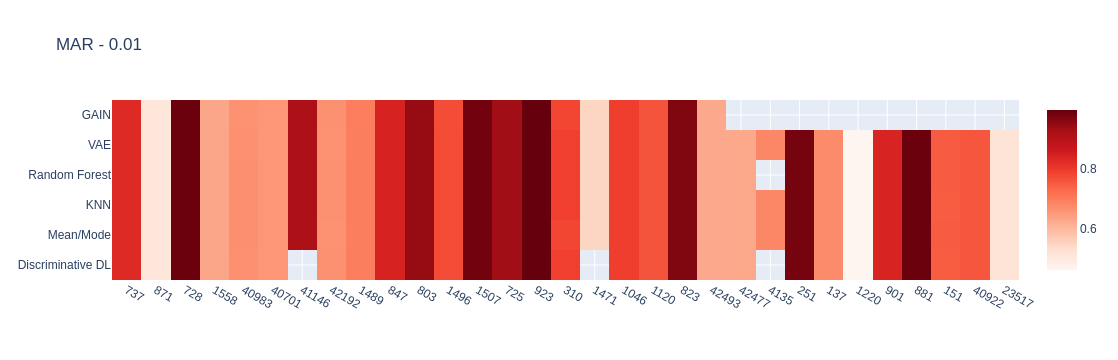

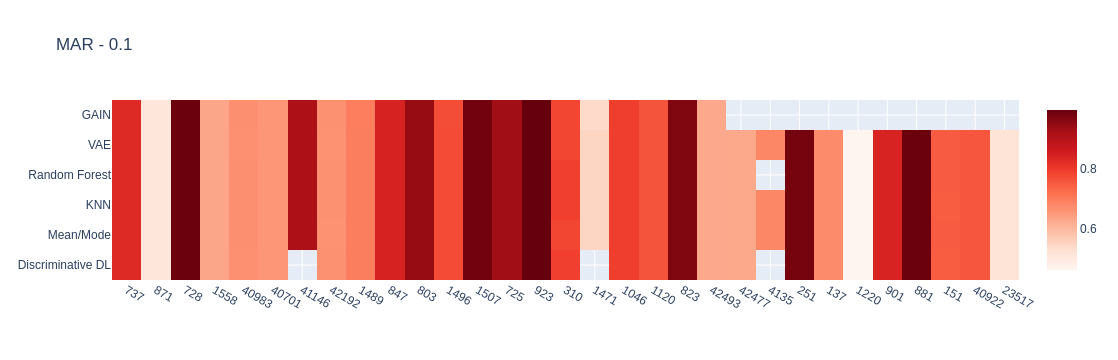

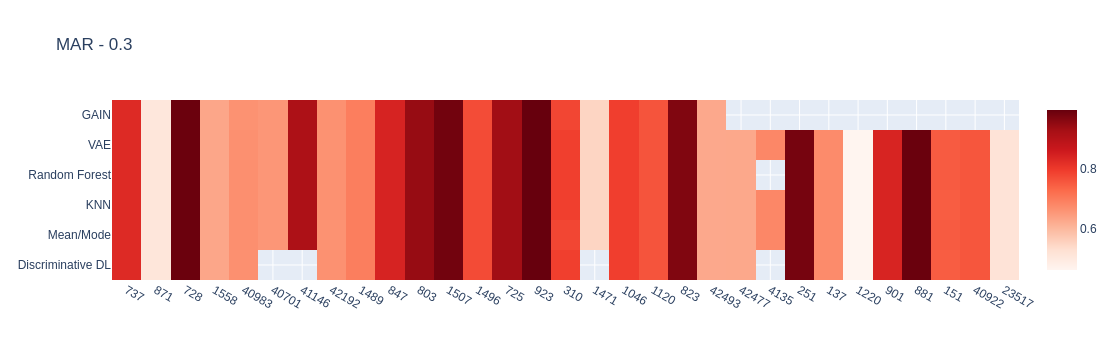

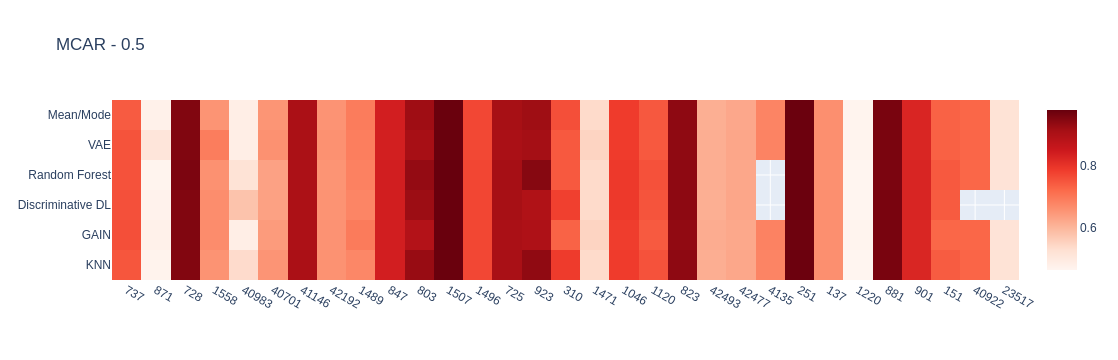

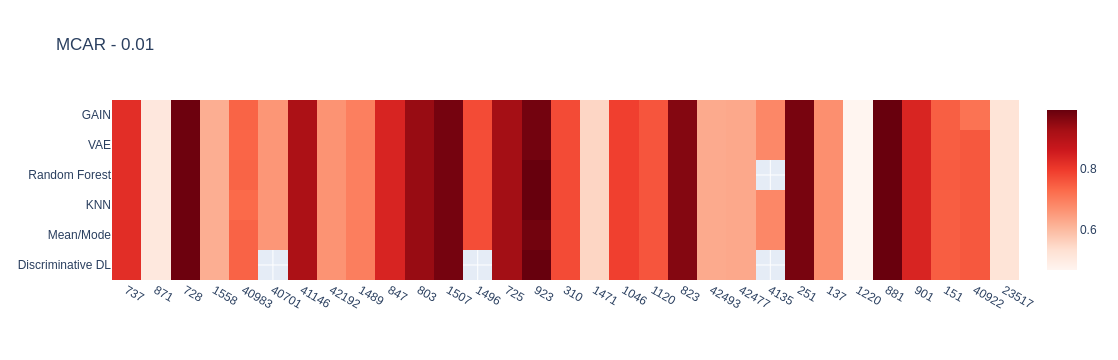

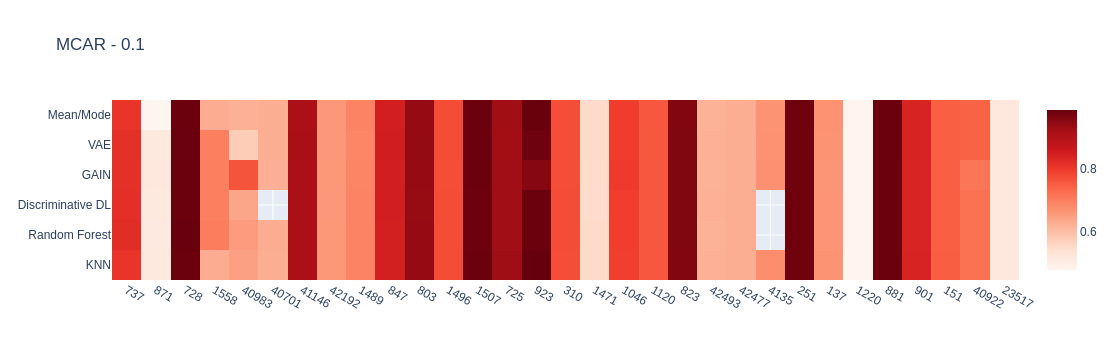

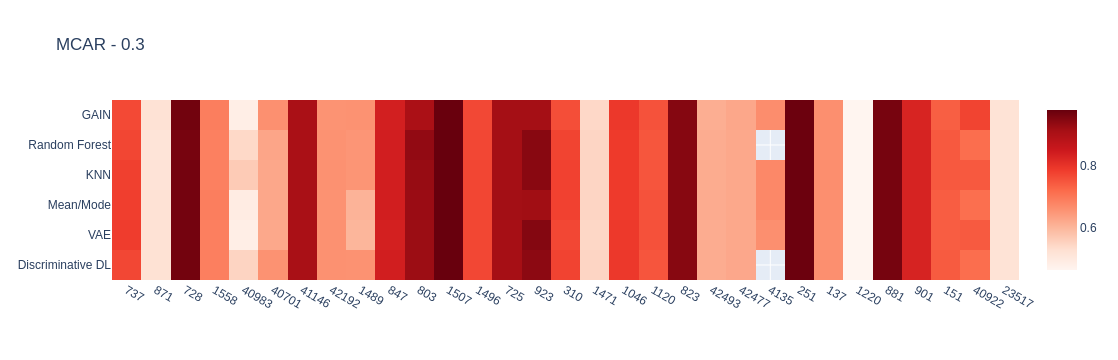

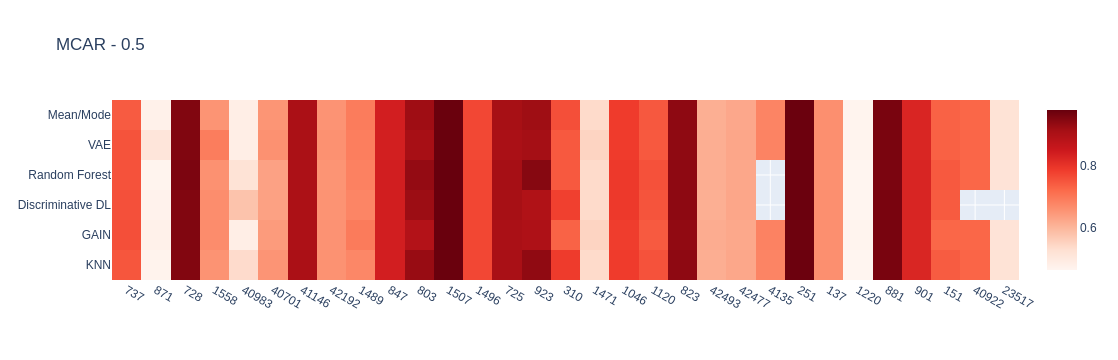

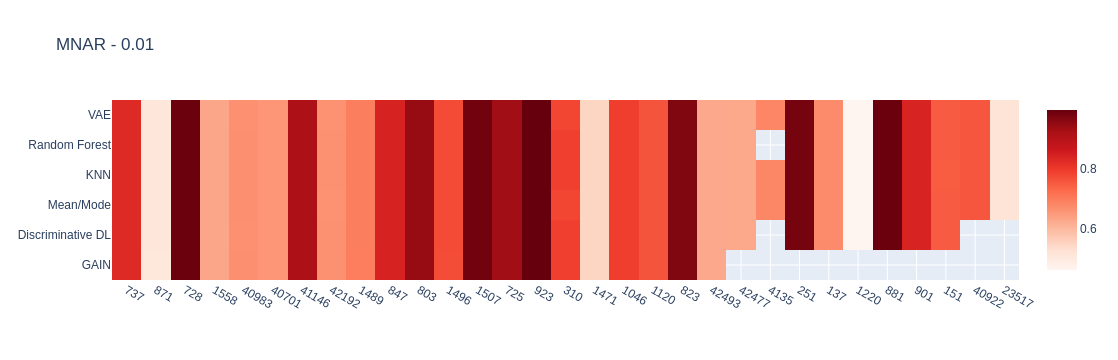

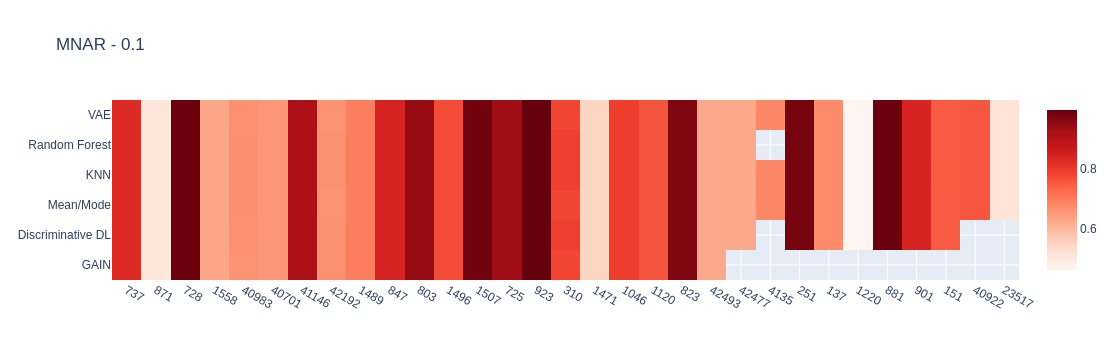

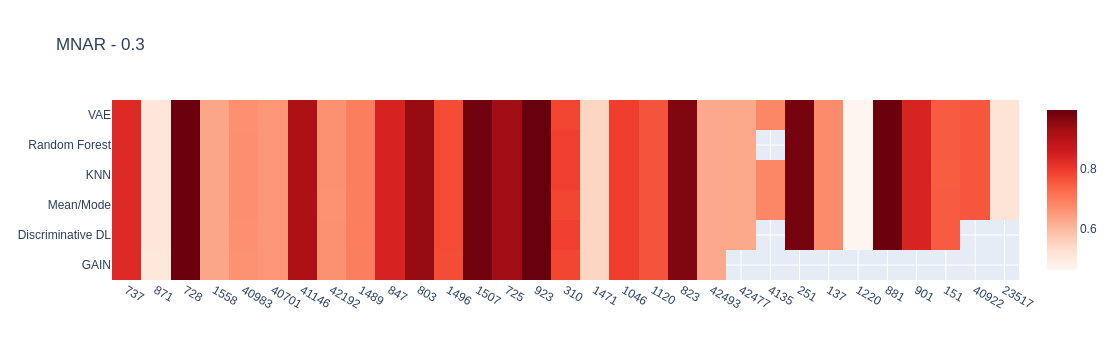

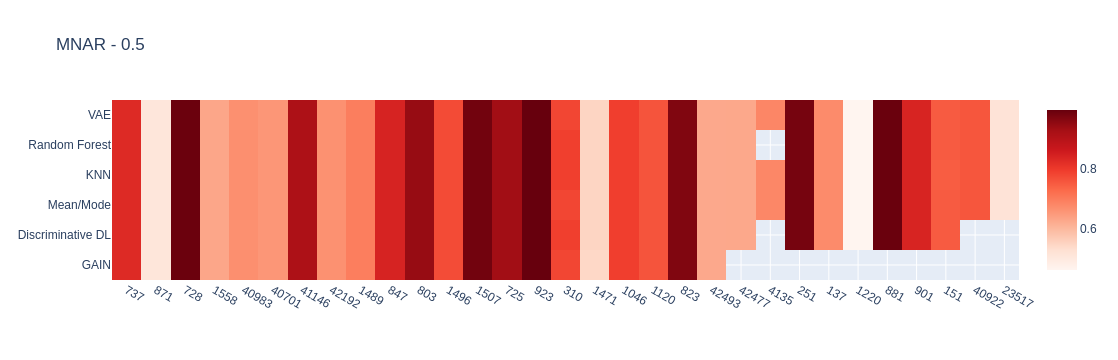

In [29]:
# Heatmap for total F1 score for each data constellation for each method

df_heat = df_heat.astype({"Task":"string"})

data_constellations = ['MAR - 0.01', 'MAR - 0.1', 'MAR - 0.3', 'MCAR - 0.5', 'MCAR - 0.01', 'MCAR - 0.1', 'MCAR - 0.3', 'MCAR - 0.5', 'MNAR - 0.01', 'MNAR - 0.1', 'MNAR - 0.3', 'MNAR - 0.5']


for i in data_constellations:
    data_constel = df_heat.loc[df_heat['Data_Constellation'] == i]

    ### uncomment whatever you want to investigate

    ## sort by amount datapoints (ascending)
    data_constel = data_constel.sort_values(by=['NumberOfInstances'])

    ## sort by amount of features (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfFeatures'])

    ## sort by amount of datapoints and features (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfInstances', 'NumberOfFeatures'])

    ## sort by amount of categorical features and datapoints (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfCategoricalFeatures', 'NumberOfInstances'])

    ## sort by amount of numerical features and datapoints (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfNumericFeatures', 'NumberOfInstances'])
    
    Dataset_number = data_constel["Task"]
    Imputation_Method = data_constel["Imputation_Method"]
    F1_Score = data_constel["Imputed"]
    

    trace = go.Heatmap(
                   z=F1_Score,
                   x=Dataset_number,
                   y=Imputation_Method,
                   type = 'heatmap',
                    autocolorscale= False,
                    colorscale = 'Reds',
                    zmin=0,
                    )
    data = [trace]
    fig = go.Figure(data=data)
    fig.update_layout(
        title=i,
        xaxis_nticks=36)
    fig.show()

In [30]:
#downstream_results_rank_heatmap2
df_heat_dif = downstream_results_rank_heatmap2.copy()

In [31]:
# Calculate Difference for every Imputation towards average best Imputation Method per Data Constellation
# Calculation for F1 Score Differences (not Percentage)

data = downstream_results_rank.copy()
data['Task'] = data['Task'].astype(str)
data['Data_Constellation_full'] = data['Data_Constellation'] + ' - ' + data['Task']

dc_unique = data.Data_Constellation_full.unique()
#print(dc_unique)

data_constellations = dc_unique.tolist()
methods = ['Random Forest', 'KNN', 'Mean/Mode', 'VAE', 'GAIN', 'Discriminative DL']
heatmap_data_difference = pd.DataFrame()


for i in data_constellations:
    data_constel = data.loc[data['Data_Constellation_full'] == i]
    average_best = data_constel.loc[data_constel['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD]
    dataset_number = best_score.iloc[0]['Task']
    for i in methods:
        if ((data_constel['Imputation_Method'] == i).any()):
            if average_best.empty:#dataset_number != '4135'
                print("No average best result for", dataset_number)
                #print(dataset_number)  
            else:
                current_score_row = data_constel.loc[data['Imputation_Method'] == i]
                current_score_int = current_score_row.iloc[0]['Imputed']
                average_best_int = average_best.iloc[0]['Imputed']
                calc_result = (current_score_int - average_best_int)
            
                current_score_row['Performance Difference to Average Best'] = calc_result
                heatmap_data_difference = heatmap_data_difference.append(current_score_row)               
    
        else:
            print(dataset_number,"Imputation Method not here ---------------------")



heatmap_data_difference['Missing Type'] = heatmap_data_difference['Missing Type'].astype(str)
heatmap_data_difference['Missing Fraction'] = heatmap_data_difference['Missing Fraction'].astype(str)
heatmap_data_difference

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Impu

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------
42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

42493 Imputation Method not here ---------------------


C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\2342550958.py:32: FutureWarning:

T

Imputation_Method   Task Missing Type Missing Fraction  \
2         Random Forest    137          MAR             0.01   
1                   KNN    137          MAR             0.01   
0             Mean/Mode    137          MAR             0.01   
3                   VAE    137          MAR             0.01   
4     Discriminative DL    137          MAR             0.01   
...                 ...    ...          ...              ...   
2100                KNN  42493         MNAR              0.5   
2104          Mean/Mode  42493         MNAR              0.5   
2102                VAE  42493         MNAR              0.5   
2099               GAIN  42493         MNAR              0.5   
2103  Discriminative DL  42493         MNAR              0.5   

                 Column                  result_type                metric  \
2     top-middle-square  downstream_performance_mean  Classification Tasks   
1     top-middle-square  downstream_performance_mean  Classification Tasks   
0     top-middle-square  downstream_performance_mean  Classification Tasks   
3     top-middle-square  downstream_performance_mean  Classification Tasks   
4     top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2100             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   
2102             Length  downstream_performance_mean  Classification Tasks   
2099             Length  downstream_performance_mean  Classification Tasks   
2103             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...  MinorityClassSize NumberOfFeatures  \
2     0.674685        0.0  0.674685  ...            13664.0             10.0   
1     0.674685        0.0  0.674685  ...            13664.0             10.0   
0     0.674685        0.0  0.674685  ...            13664.0             10.0   
3     0.674685        0.0  0.674685  ...            13664.0             10.0   
4     0.674685        0.0  0.674685  ...            13664.0             10.0   
...        ...        ...       ...  ...                ...              ...   
2100  0.627487        0.0  0.627487  ...            12035.0              8.0   
2104  0.627487        0.0  0.627565  ...            12035.0              8.0   
2102  0.627487        0.0  0.627487  ...            12035.0              8.0   
2099  0.627487        0.0  0.627433  ...            12035.0              8.0   
2103  0.627487        0.0  0.627487  ...            12035.0              8.0   

      NumberOfInstances  NumberOfNumericFeatures  NumberOfCategoricalFeatures  \
2               39366.0                      0.0                         10.0   
1               39366.0                      0.0                         10.0   
0               39366.0                      0.0                         10.0   
3               39366.0                      0.0                         10.0   
4               39366.0                      0.0                         10.0   
...                 ...                      ...                          ...   
2100            26969.0                      2.0                          6.0   
2104            26969.0                      2.0                          6.0   
2102            26969.0                      2.0                          6.0   
2099            26969.0                      2.0                          6.0   
2103            26969.0                      2.0                          6.0   

      NumberOfClasses  Downstream Performance Rank  Data_Constellation  \
2                 NaN                          3.0          MAR - 0.01   
1                 NaN                          2.0          MAR - 0.01   
0                 NaN                          1.0          MAR - 0.01   
3                 NaN                          4.0          MAR - 0.01

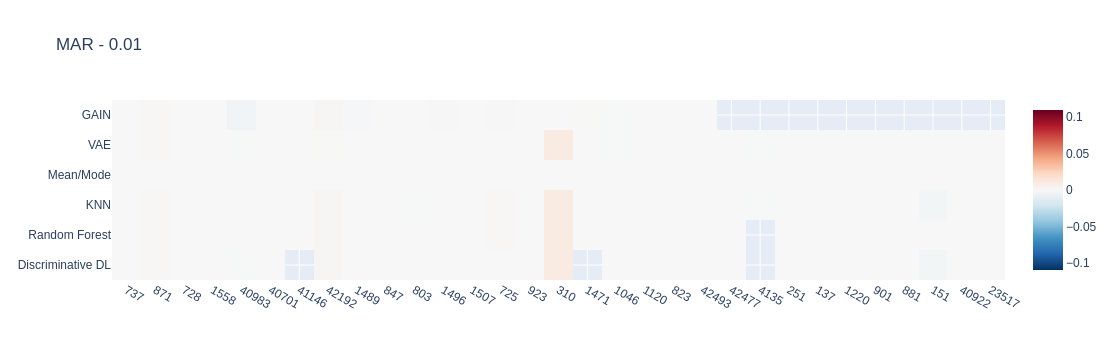

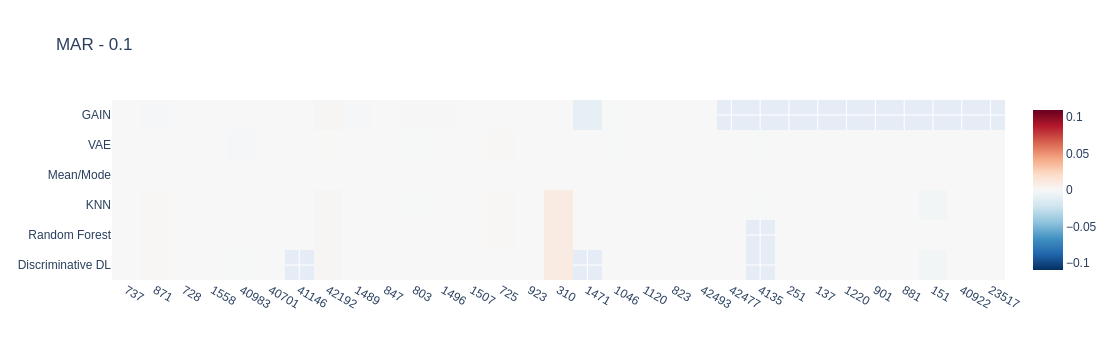

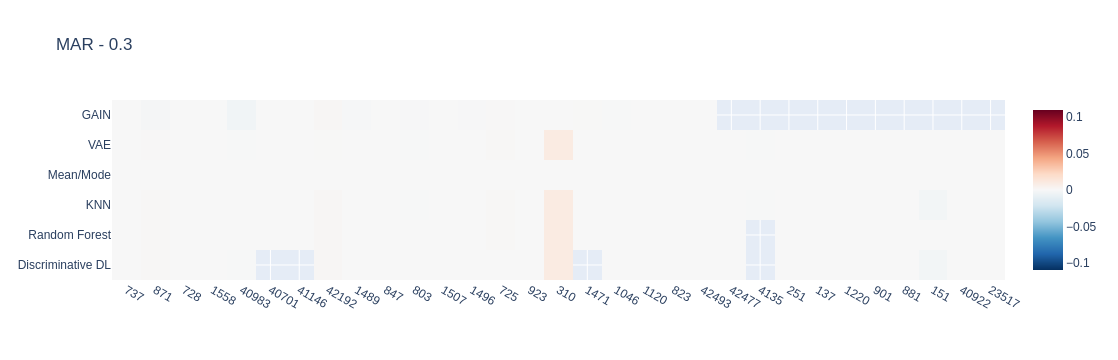

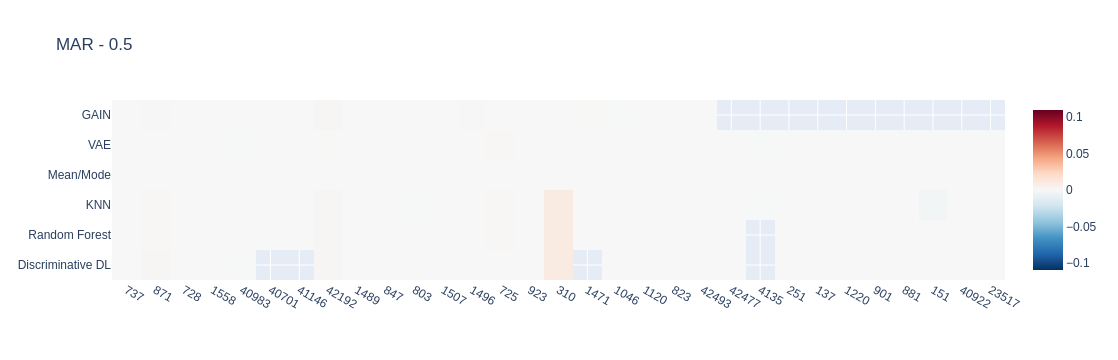

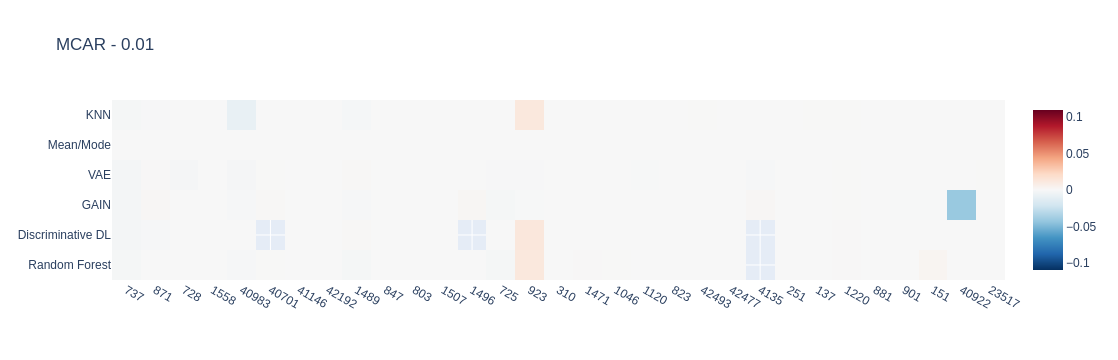

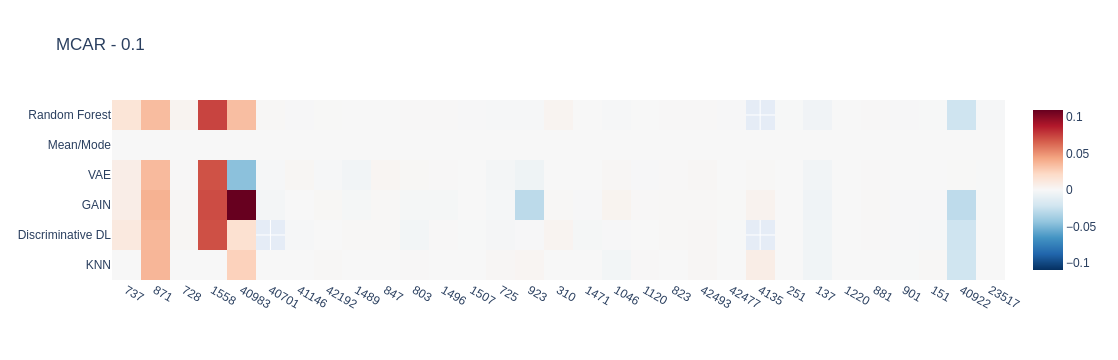

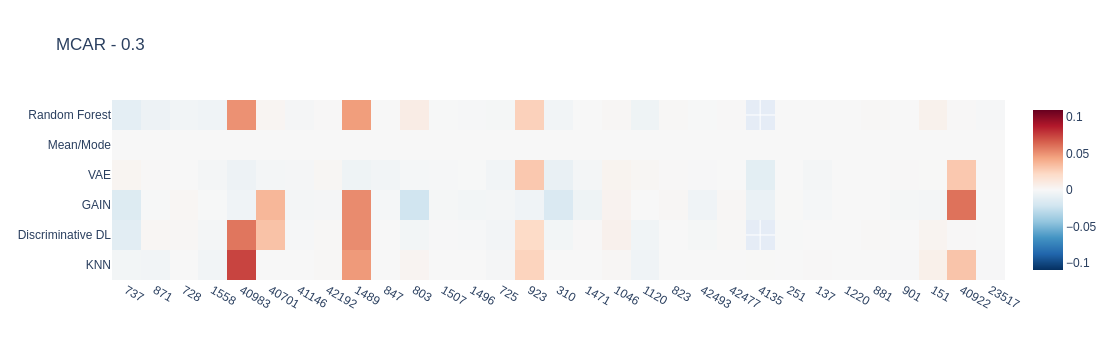

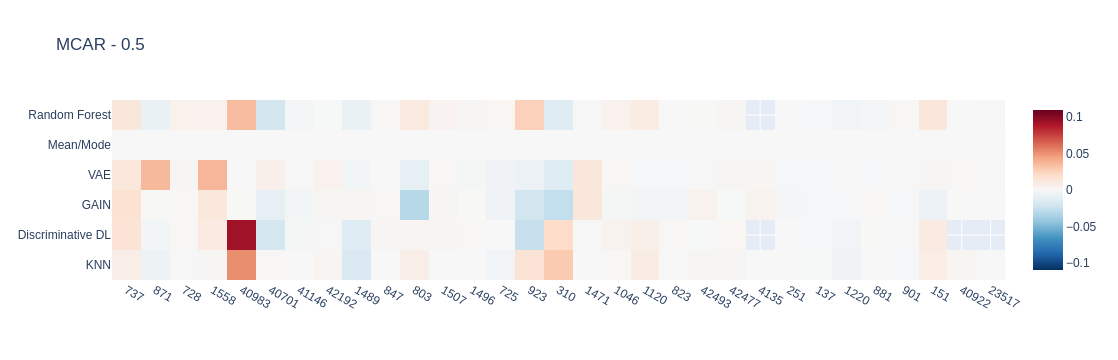

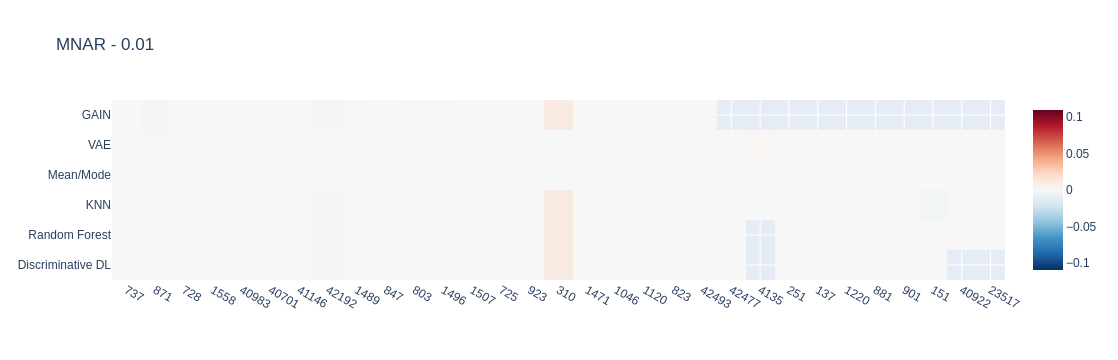

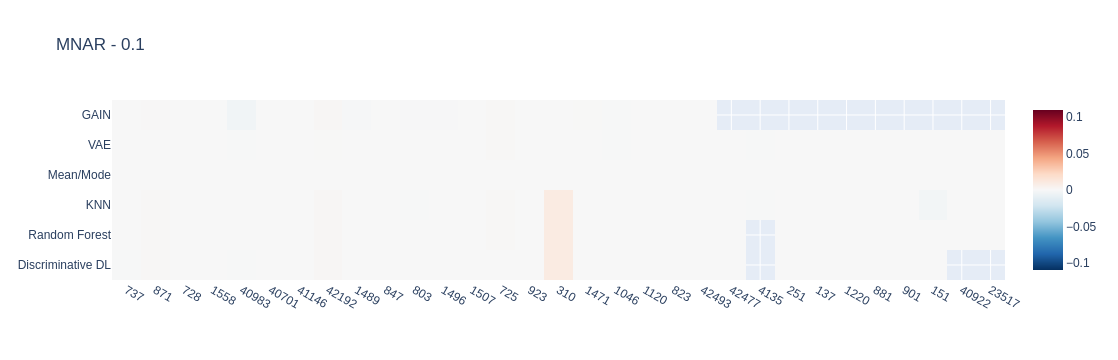

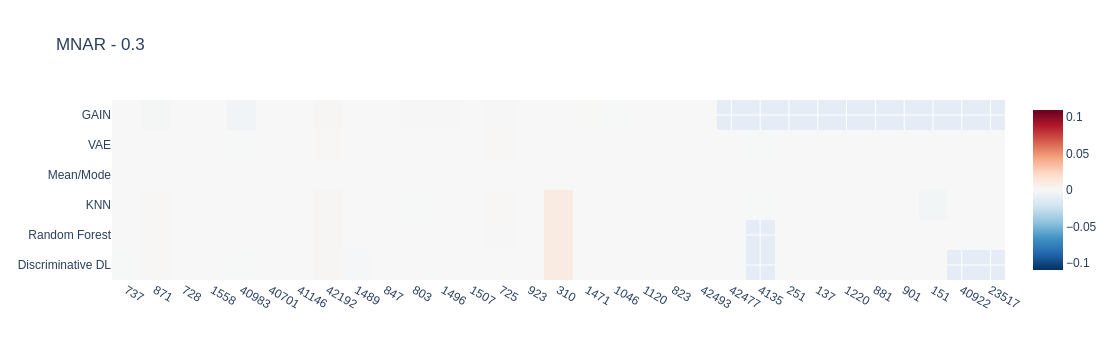

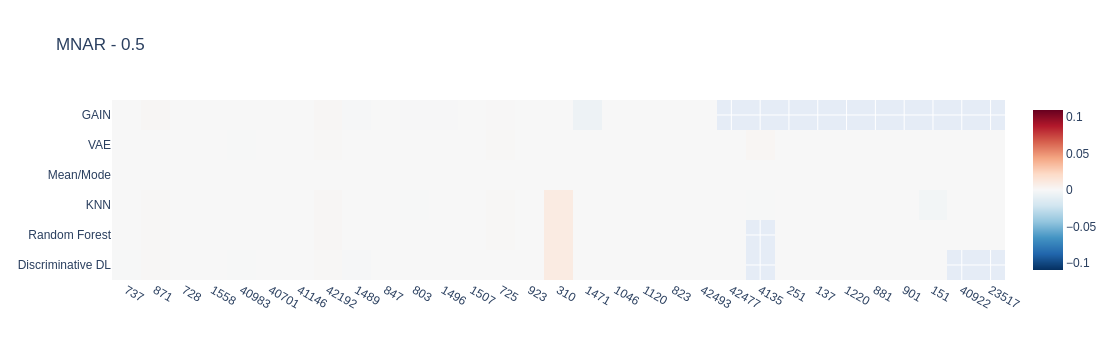

In [32]:
# Heatmap for F1 score differences for each data constellation for each method relative to average best imputation method

heatmap_data_difference = heatmap_data_difference.astype({"Task":"string"})
data_constellations = ['MAR - 0.01', 'MAR - 0.1', 'MAR - 0.3', 'MAR - 0.5', 'MCAR - 0.01', 'MCAR - 0.1', 'MCAR - 0.3', 'MCAR - 0.5', 'MNAR - 0.01', 'MNAR - 0.1', 'MNAR - 0.3', 'MNAR - 0.5']

for i in data_constellations:
    data_constel = heatmap_data_difference.loc[df_heat['Data_Constellation'] == i]

    ### uncomment whatever you want to investigate

    ## sort by amount datapoints (ascending)
    data_constel = data_constel.sort_values(by=['NumberOfInstances'])

    ## sort by amount of features (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfFeatures'])

    ## sort by amount of datapoints and features (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfInstances', 'NumberOfFeatures'])

    ## sort by amount of categorical features and datapoints (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfCategoricalFeatures', 'NumberOfInstances'])

    ## sort by amount of numerical features and datapoints (ascending)
    #data_constel = data_constel.sort_values(by=['NumberOfNumericFeatures', 'NumberOfInstances'])
    
    Dataset_number = data_constel["Task"]
    Imputation_Method = data_constel["Imputation_Method"]
    Improvement = data_constel["Performance Difference to Average Best"]
    

    trace = go.Heatmap(
                   z=Improvement,
                   x=Dataset_number,
                   y=Imputation_Method,
                   type = 'heatmap',
                    autocolorscale= False,
                    colorscale = 'RdBu_r',
                    zmid=0,
                    zmin=(-0.11),
                    zmax=0.11,
                    )
    data = [trace]
    fig = go.Figure(data=data)
    fig.update_layout(
        title=i,
        xaxis_nticks=36)
    fig.show()
    fig.write_image("binary_heatmap_f1_score_improvement_to_avbest%s.pdf" %i)

In [33]:
#heatmap_data_difference.agg(['min', 'max'])

## Improvment Proportions for All Data Constellations and Methods Relative to Average Best Method

In [34]:
heatmap_data_difference
heatmap_data_difference.to_csv('binary_imputed_full_info.csv', index=False)
#heatmap_data_difference.nunique()

In [35]:
# sorting data by total improvement
df_quantiles = heatmap_data_difference.copy()

df_quantiles = df_quantiles.drop(df_quantiles[df_quantiles["Imputation_Method"] == AVERAGE_BEST_IMPUTATION_METHOD].index)


df_10 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] > (-0.09))].index)
df_09 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (-0.09)) | (df_quantiles["Performance Difference to Average Best"] > (-0.07))].index)
df_07 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (-0.07)) | (df_quantiles["Performance Difference to Average Best"] > (-0.05))].index)
df_05 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (-0.05)) | (df_quantiles["Performance Difference to Average Best"] > (-0.03))].index)
df_03 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (-0.03)) | (df_quantiles["Performance Difference to Average Best"] > (-0.01))].index)
df_01 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (-0.01)) | (df_quantiles["Performance Difference to Average Best"] > (0.01))].index)
df01 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (0.01)) | (df_quantiles["Performance Difference to Average Best"] > (0.03))].index)
df03 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (0.03)) | (df_quantiles["Performance Difference to Average Best"] > (0.05))].index)
df05 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (0.05)) | (df_quantiles["Performance Difference to Average Best"] > (0.07))].index)
df07 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (0.07)) | (df_quantiles["Performance Difference to Average Best"] > (0.09))].index)
df09 = df_quantiles.drop(df_quantiles[(df_quantiles["Performance Difference to Average Best"] <= (0.09))].index)

#df_quantiles
#df_quantiles.dtypes

In [36]:
len_df_10 = len(df_10.index)
len_df_09 = len(df_09.index)
len_df_07 = len(df_07.index)
len_df_05 = len(df_05.index)
len_df_03 = len(df_03.index)
len_df_01 = len(df_01.index)
len_df01 = len(df01.index)
len_df03 = len(df03.index)
len_df05 = len(df05.index)
len_df07 = len(df07.index)
len_df09 = len(df09.index)

quantile_freq = []

quantile_freq.extend((len_df_10, len_df_09, len_df_07, len_df_05, len_df_03, len_df_01, len_df01, len_df03, len_df05, len_df07, len_df09))
print(quantile_freq)


quantiles = []
quantiles.extend(['less than -0.09', '-0.09 to -0.07', '-0.07 to -0.05', '-0.05 to -0.03','-0.03 to -0.01', '-0.01 to 0.01', '0.01 to 0.03', '0.03 to 0.05', '0.05 to 0.07', '0.07 to 0.09', 'more than 0.09'])
print(quantiles)

improvement_quantiles = pd.DataFrame(
    {'Improvement to Average Best': quantiles,
     'Amount': quantile_freq,
    })


[0, 0, 0, 3, 20, 1656, 27, 14, 6, 5, 2]
['less than -0.09', '-0.09 to -0.07', '-0.07 to -0.05', '-0.05 to -0.03', '-0.03 to -0.01', '-0.01 to 0.01', '0.01 to 0.03', '0.03 to 0.05', '0.05 to 0.07', '0.07 to 0.09', 'more than 0.09']


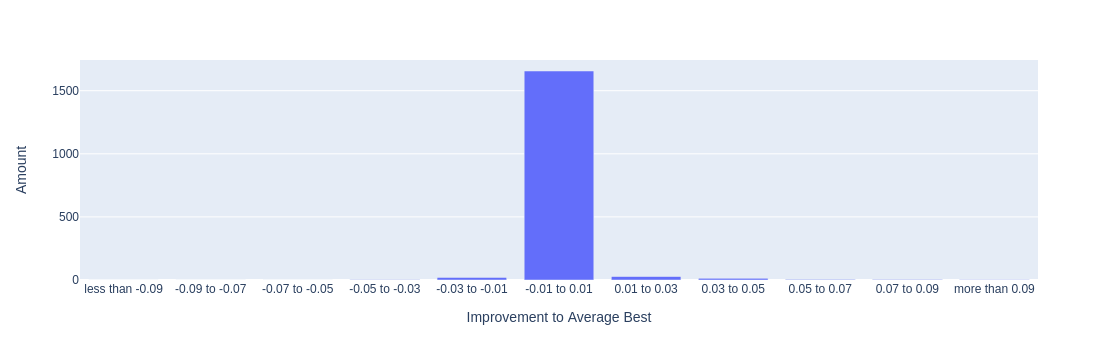

In [37]:
#fig = px.bar(improvement_quantiles, x='Improvement to Average Best', y='Amount',title="Improvement Relative to Average Best for All Dataconstellations and Imputation Methods")
fig = px.bar(improvement_quantiles, x='Improvement to Average Best', y='Amount')

fig.show()
fig.write_image("improv_rel_to_av_all_DC_no_av_incl.pdf")


In [38]:
# split barchart stacks into methods

quantile_datasets = [df_10, df_09, df_07, df_05, df_03, df_01, df01, df03, df05, df07, df09]

methods = ['Random Forest', 'KNN', 'Mean/Mode', 'VAE', 'GAIN', 'Discriminative DL']
methods.remove(AVERAGE_BEST_IMPUTATION_METHOD)
print(methods)

forest_freq = []
knn_freq = []
mode_freq = []
dl_freq = []
vae_freq = []
gain_freq = []
#print(quantile_datasets)

for i in methods:
    for j in quantile_datasets:

        df_temp = j.copy()
        df_temp = df_temp[df_temp['Imputation_Method'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == 'Random Forest'):
            forest_freq.append(df_temp_len)
        elif (i == 'KNN'):
            knn_freq.append(df_temp_len)                                       
        elif (i == 'Mean/Mode'):
            mode_freq.append(df_temp_len)                                                 
        elif (i == 'Discriminative DL'):
            dl_freq.append(df_temp_len)                                       
        elif (i == 'VAE'):
            vae_freq.append(df_temp_len)                                         
        elif (i == 'GAIN'):
            gain_freq.append(df_temp_len)                                          
                                       
print(forest_freq)
print(knn_freq)
print(mode_freq)
print(dl_freq)
print(vae_freq)
print(gain_freq)

['Random Forest', 'KNN', 'VAE', 'GAIN', 'Discriminative DL']
[0, 0, 0, 0, 4, 343, 7, 4, 1, 1, 0]
[0, 0, 0, 0, 2, 360, 5, 3, 1, 1, 0]
[]
[0, 0, 0, 0, 5, 318, 8, 2, 2, 1, 1]
[0, 0, 0, 1, 2, 361, 4, 3, 0, 1, 0]
[0, 0, 0, 2, 7, 274, 3, 2, 2, 1, 1]


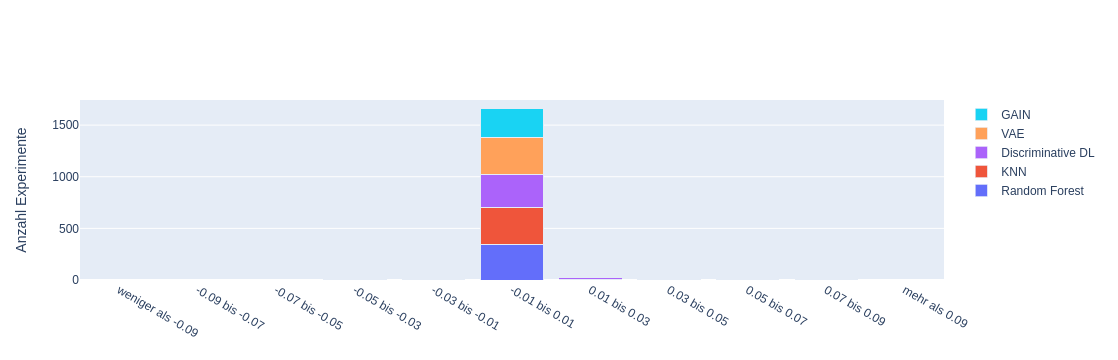

In [39]:
quantiles = ['weniger als -0.09', '-0.09 bis -0.07', '-0.07 bis -0.05', '-0.05 bis -0.03','-0.03 bis -0.01', '-0.01 bis 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']

fig = go.Figure(data=[
    go.Bar(name='Random Forest', x=quantiles, y=forest_freq),
    go.Bar(name='KNN', x=quantiles, y=knn_freq),
    go.Bar(name='Mean/Mode', x=quantiles, y=mode_freq),
    go.Bar(name='Discriminative DL', x=quantiles, y=dl_freq),
    go.Bar(name='VAE', x=quantiles, y=vae_freq),
    go.Bar(name='GAIN', x=quantiles, y=gain_freq)
])
# Change the bar mode
#fig.update_layout(barmode='stack', title_text='Improvement Relative to Average Best for All Dataconstellations and Imputation Methods')
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_per_method.png")
fig.show()

In [40]:
# split barchart stacks into methods

quantile_datasets = [df_10, df_09, df_07, df_05, df_03, df_01, df01, df03, df05, df07, df09]

fractions = ['0.01', '0.1', '0.3', '0.5']
print(fractions)
#print(df_10)

freq_001 = []
freq_01 = []
freq_03 = []
freq_05 = []
#print(quantile_datasets)

for i in fractions:
    for j in quantile_datasets:
        df_temp = j.copy()
        df_temp = df_temp[df_temp['Missing Fraction'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == '0.01'):
            freq_001.append(df_temp_len)
        elif (i == '0.1'):
            freq_01.append(df_temp_len)                                       
        elif (i == '0.3'):
            freq_03.append(df_temp_len)                                                 
        elif (i == '0.5'):
            freq_05.append(df_temp_len)                                       
                                        
                                       
print(freq_001)
print(freq_01)
print(freq_03)
print(freq_05)

['0.01', '0.1', '0.3', '0.5']
[0, 0, 0, 1, 0, 429, 3, 0, 0, 0, 0]
[0, 0, 0, 1, 5, 413, 4, 6, 0, 4, 1]
[0, 0, 0, 0, 6, 412, 5, 5, 5, 1, 0]
[0, 0, 0, 1, 9, 402, 15, 3, 1, 0, 1]


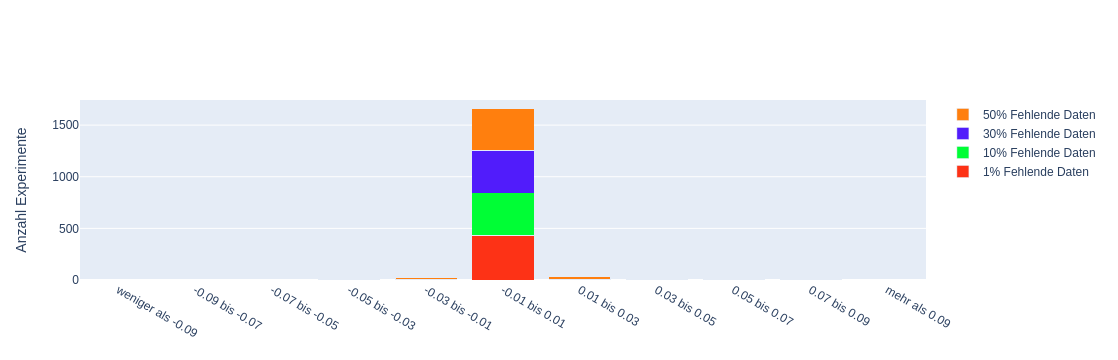

In [41]:
quantiles = ['weniger als -0.09', '-0.09 bis -0.07', '-0.07 bis -0.05', '-0.05 bis -0.03','-0.03 bis -0.01', '-0.01 bis 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']


fig = go.Figure(data=[
    go.Bar(name='1% Fehlende Daten', x=quantiles, y=freq_001, marker_color='#FD3216'),
    go.Bar(name='10% Fehlende Daten', x=quantiles, y=freq_01, marker_color='#00FE35'),
    go.Bar(name='30% Fehlende Daten', x=quantiles, y=freq_03, marker_color='#511CFB'),
    go.Bar(name='50% Fehlende Daten', x=quantiles, y=freq_05, marker_color='#FF7F0E'),
])
# Change the bar mode
#fig.update_layout(barmode='stack', title_text='Improvement Relative to Average Best for All Dataconstellations and Imputation Methods Sort by Missingness Fraction')
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')

fig.show()
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_per_frac.png")

In [42]:
# split barchart stacks into methods

quantile_datasets = [df_10, df_09, df_07, df_05, df_03, df_01, df01, df03, df05, df07, df09]

fractions = ['MCAR', 'MAR', 'MNAR']
print(fractions)
#print(df_10)

freq_001 = []
freq_01 = []
freq_03 = []
#print(quantile_datasets)

for i in fractions:
    for j in quantile_datasets:
        #print(j)
        df_temp = j.copy()
        df_temp = df_temp[df_temp['Missing Type'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == 'MCAR'):
            freq_001.append(df_temp_len)
        elif (i == 'MAR'):
            freq_01.append(df_temp_len)                                       
        elif (i == 'MNAR'):
            freq_03.append(df_temp_len)                                                 
                                      
                                        
                                       
print(freq_001)
print(freq_01)
print(freq_03)


['MCAR', 'MAR', 'MNAR']
[0, 0, 0, 3, 20, 530, 27, 14, 6, 5, 2]
[0, 0, 0, 0, 0, 562, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 564, 0, 0, 0, 0, 0]


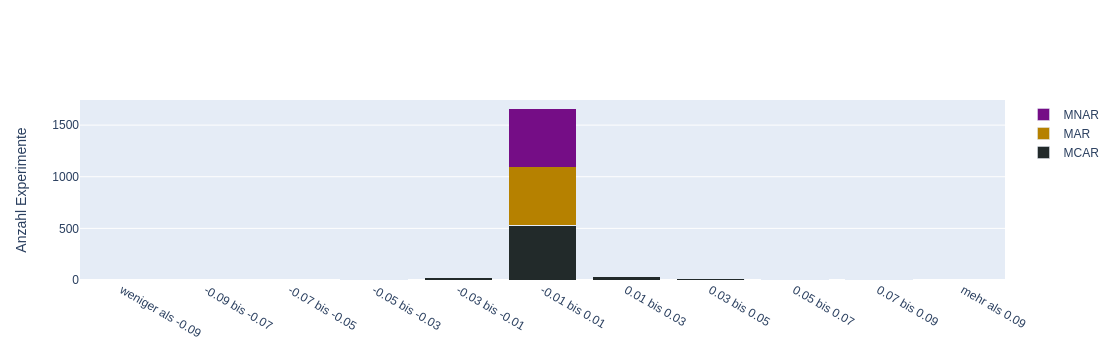

In [43]:
quantiles = ['weniger als -0.09', '-0.09 bis -0.07', '-0.07 bis -0.05', '-0.05 bis -0.03','-0.03 bis -0.01', '-0.01 bis 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']


fig = go.Figure(data=[
    go.Bar(name='MCAR', x=quantiles, y=freq_001, marker_color='#222A2A'),
    go.Bar(name='MAR', x=quantiles, y=freq_01, marker_color='#B68100'),
    go.Bar(name='MNAR', x=quantiles, y=freq_03, marker_color='#750D86'),
])
# Change the bar mode
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')
fig.show()
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_per_patt.png")


## Improvment Proportions for the Best Imputation Method per Data Constellation Relative to Average Best Method

In [44]:
improv_to_av_bar = heatmap_data_difference.copy()

improv_to_av_bar = improv_to_av_bar.drop(improv_to_av_bar[improv_to_av_bar["Downstream Performance Rank"] != 1.0].index)

df_01 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (-0.01)) | (improv_to_av_bar["Performance Difference to Average Best"] > (0.01))].index)
df01 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (0.01)) | (improv_to_av_bar["Performance Difference to Average Best"] > (0.03))].index)
df03 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (0.03)) | (improv_to_av_bar["Performance Difference to Average Best"] > (0.05))].index)
df05 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (0.05)) | (improv_to_av_bar["Performance Difference to Average Best"] > (0.07))].index)
df07 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (0.07)) | (improv_to_av_bar["Performance Difference to Average Best"] > (0.09))].index)
df09 = improv_to_av_bar.drop(improv_to_av_bar[(improv_to_av_bar["Performance Difference to Average Best"] <= (0.09))].index)

improv_to_av_bar

Imputation_Method   Task Missing Type Missing Fraction  \
0            Mean/Mode    137          MAR             0.01   
5            Mean/Mode    137          MAR              0.1   
10           Mean/Mode    137          MAR              0.3   
15           Mean/Mode    137          MAR              0.5   
25                 KNN    137         MCAR             0.01   
...                ...    ...          ...              ...   
2080              GAIN  42493         MCAR              0.5   
2086         Mean/Mode  42493         MNAR             0.01   
2092         Mean/Mode  42493         MNAR              0.1   
2098         Mean/Mode  42493         MNAR              0.3   
2104         Mean/Mode  42493         MNAR              0.5   

                 Column                  result_type                metric  \
0     top-middle-square  downstream_performance_mean  Classification Tasks   
5     top-middle-square  downstream_performance_mean  Classification Tasks   
10    top-middle-square  downstream_performance_mean  Classification Tasks   
15    top-middle-square  downstream_performance_mean  Classification Tasks   
25    top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2080             Length  downstream_performance_mean  Classification Tasks   
2086             Length  downstream_performance_mean  Classification Tasks   
2092             Length  downstream_performance_mean  Classification Tasks   
2098             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...  MinorityClassSize NumberOfFeatures  \
0     0.674685        0.0  0.674685  ...            13664.0             10.0   
5     0.674685        0.0  0.674685  ...            13664.0             10.0   
10    0.674685        0.0  0.674685  ...            13664.0             10.0   
15    0.674685        0.0  0.674685  ...            13664.0             10.0   
25    0.669859        0.0  0.669891  ...            13664.0             10.0   
...        ...        ...       ...  ...                ...              ...   
2080  0.611480        0.0  0.616430  ...            12035.0              8.0   
2086  0.627487        0.0  0.627565  ...            12035.0              8.0   
2092  0.627487        0.0  0.627565  ...            12035.0              8.0   
2098  0.627487        0.0  0.627565  ...            12035.0              8.0   
2104  0.627487        0.0  0.627565  ...            12035.0              8.0   

      NumberOfInstances  NumberOfNumericFeatures  NumberOfCategoricalFeatures  \
0               39366.0                      0.0                         10.0   
5               39366.0                      0.0                         10.0   
10              39366.0                      0.0                         10.0   
15              39366.0                      0.0                         10.0   
25              39366.0                      0.0                         10.0   
...                 ...                      ...                          ...   
2080            26969.0                      2.0                          6.0   
2086            26969.0                      2.0                          6.0   
2092            26969.0                      2.0                          6.0   
2098            26969.0                      2.0                          6.0   
2104            26969.0                      2.0                          6.0   

      NumberOfClasses  Downstream Performance Rank  Data_Constellation  \
0                 NaN                          1.0          MAR - 0.01   
5                 NaN                          1.0           MAR - 0.1   
10                NaN                          1.0           MAR - 0.3   
15                NaN                          1.0           MAR - 0.5   
25     

[353, 9, 4, 2, 2, 2]
['less than 0.01', '0.01 to 0.03', '0.03 to 0.05', '0.05 to 0.07', '0.07 to 0.09', 'more than 0.09']


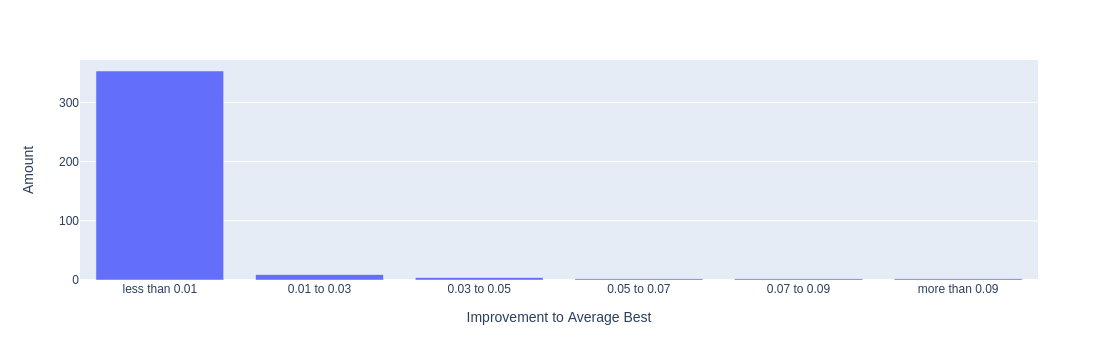

In [45]:
len_df_01 = len(df_01.index)
len_df01 = len(df01.index)
len_df03 = len(df03.index)
len_df05 = len(df05.index)
len_df07 = len(df07.index)
len_df09 = len(df09.index)

quantile_freq = []
quantile_freq.extend((len_df_01, len_df01, len_df03, len_df05, len_df07, len_df09))
print(quantile_freq)


quantiles = []
quantiles.extend(['less than 0.01', '0.01 to 0.03', '0.03 to 0.05', '0.05 to 0.07', '0.07 to 0.09', 'more than 0.09'])
print(quantiles)

improvement_quantiles = pd.DataFrame(
    {'Improvement to Average Best': quantiles,
     'Amount': quantile_freq,
    })

fig = px.bar(improvement_quantiles, x='Improvement to Average Best', y='Amount')
fig.show()
fig.write_image("improv_rel_to_av_all_DC_no_av_incl_only_best.pdf")

In [46]:
# split barchart stacks into methods

quantile_datasets = [df_01, df01, df03, df05, df07, df09]

methods = ['Random Forest', 'KNN', 'Mean/Mode', 'VAE', 'GAIN', 'Discriminative DL']
methods.remove(AVERAGE_BEST_IMPUTATION_METHOD)
print(methods)

forest_freq = []
knn_freq = []
mode_freq = []
dl_freq = []
vae_freq = []
gain_freq = []
#print(quantile_datasets)

for i in methods:
    for j in quantile_datasets:
        df_temp = j.copy()
        df_temp = df_temp[df_temp['Imputation_Method'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == 'Random Forest'):
            forest_freq.append(df_temp_len)
        elif (i == 'KNN'):
            knn_freq.append(df_temp_len)                                       
        elif (i == 'Mean/Mode'):
            mode_freq.append(df_temp_len)                                                 
        elif (i == 'Discriminative DL'):
            dl_freq.append(df_temp_len)                                       
        elif (i == 'VAE'):
            vae_freq.append(df_temp_len)                                         
        elif (i == 'GAIN'):
            gain_freq.append(df_temp_len)                                          
                                       
print(forest_freq)
print(knn_freq)
print(mode_freq)
print(dl_freq)
print(vae_freq)
print(gain_freq)

['Random Forest', 'KNN', 'VAE', 'GAIN', 'Discriminative DL']
[24, 4, 0, 0, 1, 0]
[46, 1, 0, 0, 1, 0]
[]
[21, 1, 0, 0, 0, 1]
[32, 1, 2, 0, 0, 0]
[29, 2, 2, 2, 0, 1]


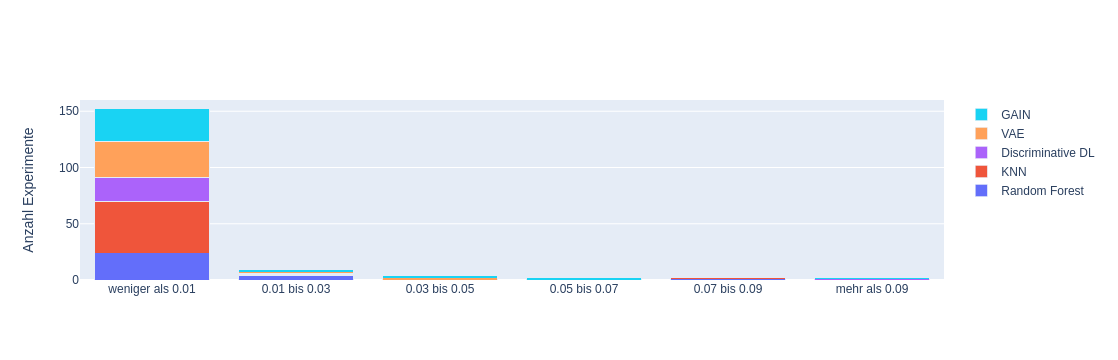

In [47]:
quantiles = ['weniger als 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']


fig = go.Figure(data=[
    go.Bar(name='Random Forest', x=quantiles, y=forest_freq),
    go.Bar(name='KNN', x=quantiles, y=knn_freq),
    go.Bar(name='Mean/Mode', x=quantiles, y=mode_freq),
    go.Bar(name='Discriminative DL', x=quantiles, y=dl_freq),
    go.Bar(name='VAE', x=quantiles, y=vae_freq),
    go.Bar(name='GAIN', x=quantiles, y=gain_freq)
])
# Change the bar mode
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')
fig.show()
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_only_best_per_method.png")

In [48]:
# split barchart stacks into missingness fractions

quantile_datasets = [df_01, df01, df03, df05, df07, df09]

fractions = ['0.01', '0.1', '0.3', '0.5']
print(fractions)


freq_001 = []
freq_01 = []
freq_03 = []
freq_05 = []
#print(quantile_datasets)

for i in fractions:
    for j in quantile_datasets:
        df_temp = j.copy()
        df_temp = df_temp[df_temp['Missing Fraction'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == '0.01'):
            freq_001.append(df_temp_len)
        elif (i == '0.1'):
            freq_01.append(df_temp_len)                                       
        elif (i == '0.3'):
            freq_03.append(df_temp_len)                                                 
        elif (i == '0.5'):
            freq_05.append(df_temp_len)                                       
                                        
                                       
print(freq_001)
print(freq_01)
print(freq_03)
print(freq_05)

['0.01', '0.1', '0.3', '0.5']
[92, 1, 0, 0, 0, 0]
[89, 1, 1, 0, 1, 1]
[88, 1, 1, 2, 1, 0]
[84, 6, 2, 0, 0, 1]


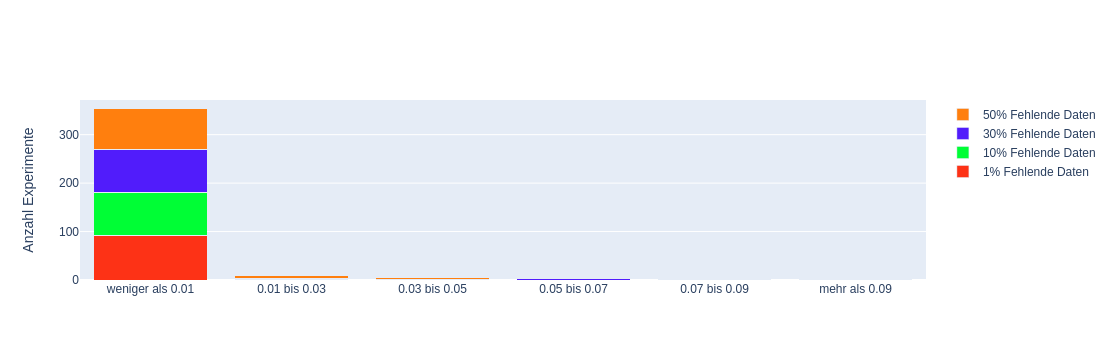

In [49]:
quantiles = ['weniger als 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']


fig = go.Figure(data=[
    go.Bar(name='1% Fehlende Daten', x=quantiles, y=freq_001, marker_color='#FD3216'),
    go.Bar(name='10% Fehlende Daten', x=quantiles, y=freq_01, marker_color='#00FE35'),
    go.Bar(name='30% Fehlende Daten', x=quantiles, y=freq_03, marker_color='#511CFB'),
    go.Bar(name='50% Fehlende Daten', x=quantiles, y=freq_05, marker_color='#FF7F0E'),
])
# Change the bar mode
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')
fig.show()
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_only_best_per_frac.png")

In [50]:
# split barchart stacks into missingness fractions

quantile_datasets = [df_01, df01, df03, df05, df07, df09]

fractions = ['MCAR', 'MAR', 'MNAR']
print(fractions)


freq_001 = []
freq_01 = []
freq_03 = []
#print(quantile_datasets)

for i in fractions:
    for j in quantile_datasets:
        df_temp = j.copy()
        df_temp = df_temp[df_temp['Missing Type'].str.contains(i)]
        df_temp_len = len(df_temp.index)
        if (i == 'MCAR'):
            freq_001.append(df_temp_len)
        elif (i == 'MAR'):
            freq_01.append(df_temp_len)                                       
        elif (i == 'MNAR'):
            freq_03.append(df_temp_len)                                                 
                                  
                                        
                                       
print(freq_001)
print(freq_01)
print(freq_03)

['MCAR', 'MAR', 'MNAR']
[105, 9, 4, 2, 2, 2]
[124, 0, 0, 0, 0, 0]
[124, 0, 0, 0, 0, 0]


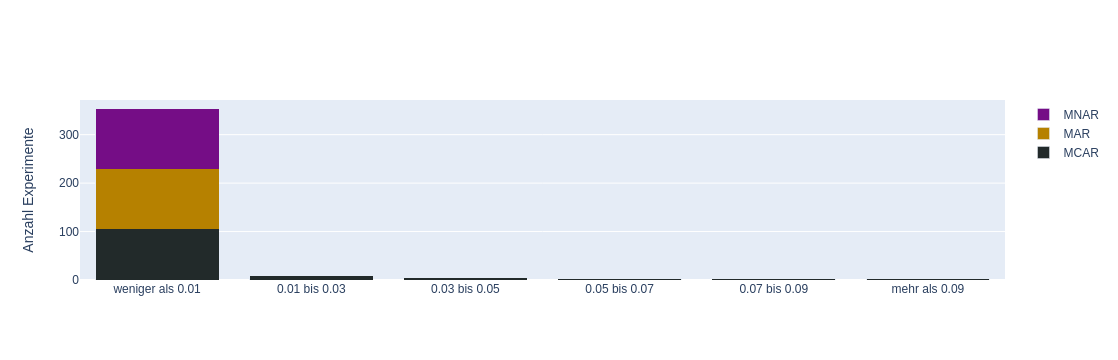

In [51]:
quantiles = ['weniger als 0.01', '0.01 bis 0.03', '0.03 bis 0.05', '0.05 bis 0.07', '0.07 bis 0.09', 'mehr als 0.09']


fig = go.Figure(data=[
    go.Bar(name='MCAR', x=quantiles, y=freq_001, marker_color='#222A2A'),
    go.Bar(name='MAR', x=quantiles, y=freq_01, marker_color='#B68100'),
    go.Bar(name='MNAR', x=quantiles, y=freq_03, marker_color='#750D86'),
])
# Change the bar mode
fig.update_layout(barmode='stack', yaxis_title='Anzahl Experimente')
fig.show()
fig.write_image("binary_improv_rel_to_av_all_DC_no_av_incl_only_best_per_patt.png")

## Extract datasets for Automated Imputation Method Selection

To Do: Explore the possibility, that the average best method replaces the best method for a data constellation, if the improvement gain for the best method is below 1%

### Potential Features:
Missingess Pattern (Missing Type)  
Missing Fraction (Missing Fraction)  
Datapoints (NumberOfInstances)  
Features in total (NumberOfFeatures)  
Numeric Features (NumberOfNumericFeatures)  
Categorical Features (NumberOfCategoricalFeatures)  
Downstream Task Type -> Classification/Regression (metric)
  
    
      
Label: Best Imputation Method (Imputation_Method)

In [52]:
# Use dataset with only the best method for each data constellation
rank_1_backup.to_csv('rank_1_backup.csv')
rank_1_backup

Imputation_Method   Task Missing Type Missing Fraction  \
0            Mean/Mode    137          MAR             0.01   
5            Mean/Mode    137          MAR              0.1   
10           Mean/Mode    137          MAR              0.3   
15           Mean/Mode    137          MAR              0.5   
25                 KNN    137         MCAR             0.01   
...                ...    ...          ...              ...   
2080              GAIN  42493         MCAR              0.5   
2086         Mean/Mode  42493         MNAR             0.01   
2092         Mean/Mode  42493         MNAR              0.1   
2098         Mean/Mode  42493         MNAR              0.3   
2104         Mean/Mode  42493         MNAR              0.5   

                 Column                  result_type                metric  \
0     top-middle-square  downstream_performance_mean  Classification Tasks   
5     top-middle-square  downstream_performance_mean  Classification Tasks   
10    top-middle-square  downstream_performance_mean  Classification Tasks   
15    top-middle-square  downstream_performance_mean  Classification Tasks   
25    top-middle-square  downstream_performance_mean  Classification Tasks   
...                 ...                          ...                   ...   
2080             Length  downstream_performance_mean  Classification Tasks   
2086             Length  downstream_performance_mean  Classification Tasks   
2092             Length  downstream_performance_mean  Classification Tasks   
2098             Length  downstream_performance_mean  Classification Tasks   
2104             Length  downstream_performance_mean  Classification Tasks   

      Baseline  Corrupted   Imputed  ...              name MajorityClassSize  \
0     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
5     0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
10    0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
15    0.674685        0.0  0.674685  ...  BNG(tic-tac-toe)           25702.0   
25    0.669859        0.0  0.669891  ...  BNG(tic-tac-toe)           25702.0   
...        ...        ...       ...  ...               ...               ...   
2080  0.611480        0.0  0.616430  ...          airlines           14934.0   
2086  0.627487        0.0  0.627565  ...          airlines           14934.0   
2092  0.627487        0.0  0.627565  ...          airlines           14934.0   
2098  0.627487        0.0  0.627565  ...          airlines           14934.0   
2104  0.627487        0.0  0.627565  ...          airlines           14934.0   

      MinorityClassSize  NumberOfFeatures  NumberOfInstances  \
0               13664.0              10.0            39366.0   
5               13664.0              10.0            39366.0   
10              13664.0              10.0            39366.0   
15              13664.0              10.0            39366.0   
25              13664.0              10.0            39366.0   
...                 ...               ...                ...   
2080            12035.0               8.0            26969.0   
2086            12035.0               8.0            26969.0   
2092            12035.0               8.0            26969.0   
2098            12035.0               8.0            26969.0   
2104            12035.0               8.0            26969.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  NumberOfClasses  \
0                         0.0                         10.0              NaN   
5                         0.0                         10.0              NaN   
10                        0.0                         10.0              NaN   
15                        0.0                         10.0              NaN   
25                        0.0                         10.0              NaN   
...                       ...                          ...              ...   
2080                      2.

In [53]:
# Dataset for Training 
properties_train_dataset_1 = rank_1_backup.copy()
properties_train_dataset_1 = properties_train_dataset_1[['Imputation_Method','Missing Type','Missing Fraction',
                                                         'NumberOfInstances','NumberOfFeatures','NumberOfNumericFeatures',
                                                         'NumberOfCategoricalFeatures','metric']]

properties_train_dataset_1


Imputation_Method Missing Type Missing Fraction  NumberOfInstances  \
0            Mean/Mode          MAR             0.01            39366.0   
5            Mean/Mode          MAR              0.1            39366.0   
10           Mean/Mode          MAR              0.3            39366.0   
15           Mean/Mode          MAR              0.5            39366.0   
25                 KNN         MCAR             0.01            39366.0   
...                ...          ...              ...                ...   
2080              GAIN         MCAR              0.5            26969.0   
2086         Mean/Mode         MNAR             0.01            26969.0   
2092         Mean/Mode         MNAR              0.1            26969.0   
2098         Mean/Mode         MNAR              0.3            26969.0   
2104         Mean/Mode         MNAR              0.5            26969.0   

      NumberOfFeatures  NumberOfNumericFeatures  NumberOfCategoricalFeatures  \
0                 10.0                      0.0                         10.0   
5                 10.0                      0.0                         10.0   
10                10.0                      0.0                         10.0   
15                10.0                      0.0                         10.0   
25                10.0                      0.0                         10.0   
...                ...                      ...                          ...   
2080               8.0                      2.0                          6.0   
2086               8.0                      2.0                          6.0   
2092               8.0                      2.0                          6.0   
2098               8.0                      2.0                          6.0   
2104               8.0                      2.0                          6.0   

                    metric  
0     Classification Tasks  
5     Classification Tasks  
10    Classification Tasks  
15    Classification Tasks  
25    Classification Tasks  
...                    ...  
2080  Classification Tasks  
2086  Classification Tasks  
2092  Classification Tasks  
2098  Classification Tasks  
2104  Classification Tasks  

[372 rows x 8 columns]

In [54]:
# Dataset for Training 
properties_train_dataset_original = rank_1_backup.copy()
properties_train_dataset_original = properties_train_dataset_original[['Imputation_Method','Missing Type','Missing Fraction',
                                                         'NumberOfInstances','NumberOfFeatures','NumberOfNumericFeatures',
                                                         'NumberOfCategoricalFeatures']]

properties_train_dataset_original
properties_train_dataset_original.to_csv('binary_properties_train_dataset_original.csv', index=False)

In [55]:
properties_train_dataset_original

Imputation_Method Missing Type Missing Fraction  NumberOfInstances  \
0            Mean/Mode          MAR             0.01            39366.0   
5            Mean/Mode          MAR              0.1            39366.0   
10           Mean/Mode          MAR              0.3            39366.0   
15           Mean/Mode          MAR              0.5            39366.0   
25                 KNN         MCAR             0.01            39366.0   
...                ...          ...              ...                ...   
2080              GAIN         MCAR              0.5            26969.0   
2086         Mean/Mode         MNAR             0.01            26969.0   
2092         Mean/Mode         MNAR              0.1            26969.0   
2098         Mean/Mode         MNAR              0.3            26969.0   
2104         Mean/Mode         MNAR              0.5            26969.0   

      NumberOfFeatures  NumberOfNumericFeatures  NumberOfCategoricalFeatures  
0                 10.0                      0.0                         10.0  
5                 10.0                      0.0                         10.0  
10                10.0                      0.0                         10.0  
15                10.0                      0.0                         10.0  
25                10.0                      0.0                         10.0  
...                ...                      ...                          ...  
2080               8.0                      2.0                          6.0  
2086               8.0                      2.0                          6.0  
2092               8.0                      2.0                          6.0  
2098               8.0                      2.0                          6.0  
2104               8.0                      2.0                          6.0  

[372 rows x 7 columns]

In [56]:
df_temp.nunique()

Imputation_Method                         0
Task                                      0
Missing Type                              0
Missing Fraction                          0
Column                                    0
result_type                               0
metric                                    0
Baseline                                  0
Corrupted                                 0
Imputed                                   0
Unnamed: 0                                0
name                                      0
MajorityClassSize                         0
MinorityClassSize                         0
NumberOfFeatures                          0
NumberOfInstances                         0
NumberOfNumericFeatures                   0
NumberOfCategoricalFeatures               0
NumberOfClasses                           0
Downstream Performance Rank               0
Data_Constellation                        0
Data_Constellation_full                   0
Performance Difference to Averag

In [57]:
# Dataset for Training -> replace best method with average best if imporvement is below 1%, 2% or 3%

alternate_data = heatmap_data_difference.copy()

df_temp = alternate_data.loc[(alternate_data['Downstream Performance Rank'] == 1.0) | (alternate_data['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD)]


dc_unique = alternate_data.Data_Constellation_full.unique()
data_constellations = dc_unique.tolist()


for i in data_constellations:

    # define the threshold here!
    
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] <= 0.03) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 9.0, df_temp['Downstream Performance Rank'])
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] >= 0.03) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 11.0, df_temp['Downstream Performance Rank'])
   
df_temp = df_temp.drop(df_temp[df_temp['Downstream Performance Rank'] == 9.0].index) 

# Sorting of data

#adjust order to fit the processing time -> fastest first
methods_order = CategoricalDtype(['Random Forest', 'Mean/Mode', 'KNN', 'VAE', 'GAIN', 'Discriminative DL'], ordered=True)


df_temp['Imputation_Method'] = df_temp['Imputation_Method'].astype(methods_order)
df_temp = df_temp.sort_values(['Data_Constellation_full','Imputation_Method'], ascending=[True, True])
df_temp = df_temp.drop_duplicates(subset=["Data_Constellation_full"], keep='last')

df_temp = df_temp[['Imputation_Method','Missing Type','Missing Fraction',
                                                         'NumberOfInstances','NumberOfNumericFeatures',
                                                         'NumberOfCategoricalFeatures']]


df_temp.to_csv('binary_properties_train_dataset_3_percent.csv')
df_temp




C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\248980471.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\248980471.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Imputation_Method Missing Type Missing Fraction  NumberOfInstances  \
971          Mean/Mode          MAR             0.01            15545.0   
1041         Mean/Mode          MAR             0.01            19020.0   
1112         Mean/Mode          MAR             0.01            39948.0   
0            Mean/Mode          MAR             0.01            39366.0   
1176         Mean/Mode          MAR             0.01            14980.0   
...                ...          ...              ...                ...   
690          Mean/Mode         MNAR              0.5             6574.0   
762          Mean/Mode         MNAR              0.5             3848.0   
827          Mean/Mode         MNAR              0.5            40768.0   
891          Mean/Mode         MNAR              0.5            40768.0   
962          Mean/Mode         MNAR              0.5             8641.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  
971                       5.0                          1.0  
1041                     11.0                          1.0  
1112                      9.0                          1.0  
0                         0.0                         10.0  
1176                     14.0                          1.0  
...                       ...                          ...  
690                      14.0                          1.0  
762                       5.0                          1.0  
827                       7.0                          4.0  
891                      10.0                          1.0  
962                       3.0                          2.0  

[372 rows x 6 columns]

In [58]:
alternate_data = heatmap_data_difference.copy()

df_temp = alternate_data.loc[(alternate_data['Downstream Performance Rank'] == 1.0) | (alternate_data['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD)]


dc_unique = alternate_data.Data_Constellation_full.unique()
data_constellations = dc_unique.tolist()


for i in data_constellations:

    # define the threshold here!
    
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] <= 0.02) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 9.0, df_temp['Downstream Performance Rank'])
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] >= 0.02) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 11.0, df_temp['Downstream Performance Rank'])
   
df_temp = df_temp.drop(df_temp[df_temp['Downstream Performance Rank'] == 9.0].index) 

# Sorting of data

#adjust order to fit the processing time -> fastest first
methods_order = CategoricalDtype(['Random Forest', 'Mean/Mode', 'KNN', 'VAE', 'GAIN', 'Discriminative DL'], ordered=True)


df_temp['Imputation_Method'] = df_temp['Imputation_Method'].astype(methods_order)

df_temp = df_temp.sort_values(['Data_Constellation_full','Imputation_Method'], ascending=[True, True])
df_temp = df_temp.drop_duplicates(subset=["Data_Constellation_full"], keep='last')

df_temp = df_temp[['Imputation_Method','Missing Type','Missing Fraction',
                                                         'NumberOfInstances','NumberOfNumericFeatures',
                                                         'NumberOfCategoricalFeatures']]


df_temp.to_csv('binary_properties_train_dataset_2_percent.csv')
df_temp



C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\1218845522.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\1218845522.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Imputation_Method Missing Type Missing Fraction  NumberOfInstances  \
971          Mean/Mode          MAR             0.01            15545.0   
1041         Mean/Mode          MAR             0.01            19020.0   
1112         Mean/Mode          MAR             0.01            39948.0   
0            Mean/Mode          MAR             0.01            39366.0   
1176         Mean/Mode          MAR             0.01            14980.0   
...                ...          ...              ...                ...   
690          Mean/Mode         MNAR              0.5             6574.0   
762          Mean/Mode         MNAR              0.5             3848.0   
827          Mean/Mode         MNAR              0.5            40768.0   
891          Mean/Mode         MNAR              0.5            40768.0   
962          Mean/Mode         MNAR              0.5             8641.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  
971                       5.0                          1.0  
1041                     11.0                          1.0  
1112                      9.0                          1.0  
0                         0.0                         10.0  
1176                     14.0                          1.0  
...                       ...                          ...  
690                      14.0                          1.0  
762                       5.0                          1.0  
827                       7.0                          4.0  
891                      10.0                          1.0  
962                       3.0                          2.0  

[372 rows x 6 columns]

In [59]:
alternate_data = heatmap_data_difference.copy()

df_temp = alternate_data.loc[(alternate_data['Downstream Performance Rank'] == 1.0) | (alternate_data['Imputation_Method'] == AVERAGE_BEST_IMPUTATION_METHOD)]


dc_unique = alternate_data.Data_Constellation_full.unique()
data_constellations = dc_unique.tolist()


for i in data_constellations:

    # define the threshold here!
    
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] <= 0.01) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 9.0, df_temp['Downstream Performance Rank'])
    df_temp['Downstream Performance Rank'] = np.where((df_temp['Data_Constellation_full'] == i) & (df_temp['Performance Difference to Average Best'] >= 0.01) & (df_temp['Imputation_Method'] != AVERAGE_BEST_IMPUTATION_METHOD), 11.0, df_temp['Downstream Performance Rank'])
   
df_temp = df_temp.drop(df_temp[df_temp['Downstream Performance Rank'] == 9.0].index) 

# Sorting of data

#adjust order to fit the processing time -> fastest first
methods_order = CategoricalDtype(['Random Forest', 'Mean/Mode', 'KNN', 'VAE', 'GAIN', 'Discriminative DL'], ordered=True)


df_temp['Imputation_Method'] = df_temp['Imputation_Method'].astype(methods_order)

df_temp = df_temp.sort_values(['Data_Constellation_full','Imputation_Method'], ascending=[True, True])
df_temp = df_temp.drop_duplicates(subset=["Data_Constellation_full"], keep='last')

df_temp = df_temp[['Imputation_Method','Missing Type','Missing Fraction',
                                                         'NumberOfInstances','NumberOfNumericFeatures',
                                                         'NumberOfCategoricalFeatures']]


df_temp.to_csv('binary_properties_train_dataset_1_percent.csv')
df_temp



C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3442164498.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haag-\AppData\Local\Temp\ipykernel_2196\3442164498.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Imputation_Method Missing Type Missing Fraction  NumberOfInstances  \
971          Mean/Mode          MAR             0.01            15545.0   
1041         Mean/Mode          MAR             0.01            19020.0   
1112         Mean/Mode          MAR             0.01            39948.0   
0            Mean/Mode          MAR             0.01            39366.0   
1176         Mean/Mode          MAR             0.01            14980.0   
...                ...          ...              ...                ...   
690          Mean/Mode         MNAR              0.5             6574.0   
762          Mean/Mode         MNAR              0.5             3848.0   
827          Mean/Mode         MNAR              0.5            40768.0   
891          Mean/Mode         MNAR              0.5            40768.0   
962          Mean/Mode         MNAR              0.5             8641.0   

      NumberOfNumericFeatures  NumberOfCategoricalFeatures  
971                       5.0                          1.0  
1041                     11.0                          1.0  
1112                      9.0                          1.0  
0                         0.0                         10.0  
1176                     14.0                          1.0  
...                       ...                          ...  
690                      14.0                          1.0  
762                       5.0                          1.0  
827                       7.0                          4.0  
891                      10.0                          1.0  
962                       3.0                          2.0  

[372 rows x 6 columns]